# HW 4

ISE-530 Homework IV: from Cottle-Thapa. Due Monday 11:59 PM October 12, 2020

-  Exercise 9.4, 9.20, 9.21, 9.22, and 10.5
-  Show that the univariate function $f(x) = x^{4/3}$ has a unique minimizer at $x = 0$ but that for any nonzero initial point, the Newton sequence for minimizing $f$ diverges.
- Compute the first two iterates of the Newton Method (with unit step) starting with $x^0 = (0, 0)$ for minimizing the function: $f(x_1, x_2) = 2x^4_1 + x^2_2 − 4x_1x_2 + 5x_2$. Do the same with the steepest descent method with exact line search.
- Compute and solve the equation of the linear regression line corresponding to the univariate input-output data $(x, y)$ given by $\{(−2, 12),(−1, 11),(0, 8),(1, 5),(2, 2),(3, −3)\}$. Plot these points and the computed line in the $(x, y)$-plane.
- Suppose that the (univariate) variable y is known to be a quadratic function of the variable $x$; that is,
\begin{align}
    y = ax^2 +bx + c,
\end{align} 
where the coefficients $a, b, c$ are obtained by conducting an experiment in which values $y_1, \cdots, y_n$ of the variable $y$ are measured for corresponding values $x_1, \cdots, x_n$ of the variable $x$. Find the best least-squares fit of the quadratic polynomial using the data:
\begin{align}
    &\{ (−2, −5),(−1, −1),(0, 4),(1, 7),(2, 6),(3, 5),(4, −1) \}.
\end{align}
Plot these points and the computed quadratic curve in the $(x, y)$-plane.
- Show that the matrix
\begin{align}
    \begin{bmatrix}
        x^4 & x^3 & x^2 \\
        x^3 & x^2 & x \\
        x^2 & x & 1 \\
    \end{bmatrix}
\end{align}
is positive semidefinite but not positive definite for all values of the scalar $x$.

In [1]:
%load_ext autotime
%load_ext nb_black
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (16, 12)

import pandas as pd
import numpy as np
import cvxpy as cp
import scipy as sp
from scipy import optimize
import functools

<IPython.core.display.Javascript object>

---
## Chapter 9

### 9.4 

Apply, in turn, the Bisection Method, Newton’s Method, the Secant Method, and the Regula Falsi Method to find a zero of the polynomial $g(x) = x^3 − 7x^2 + 10x − 6$ over the interval $[2, 6]$.

In [2]:
g = lambda x: x ** 3 - 7 * x ** 2 + 10 * x - 6
g_prime = lambda x: 3 * (x ** 2) - 14 * x + 10  # Derivative of g
quadratic_formula = lambda a, b, c: (
    (-b + (b ** 2 - 4 * a * c) ** 0.5) / (2 * a),
    (-b - (b ** 2 - 4 * a * c) ** 0.5) / (2 * a),
)

time: 1.26 ms


<IPython.core.display.Javascript object>

#### Bisection Method

In [3]:
def bisection_root_finding(f, interval=[2, 6], δ=1e-05):
    assert (len(interval) == 2) & (
        interval[1] > interval[0]
    ), "interval must only have 2 values and b > a."
    root_candidate = np.mean(interval)
    while True:
        # 1. If |b−a| ≤ δ or f(c)=0, stop and report the zero as x∗=c.
        if np.allclose(np.abs(interval[1] - interval[0]), 0, rtol=δ) or np.allclose(
            f(root_candidate), 0, rtol=1e-5
        ):
            return root_candidate

        # 2. If f(a)f(c)>0, let a←c else let b←c to create a new interval.
        print(
            f"x = ({np.round(interval, 5)}/2) = {np.round(root_candidate, 5)}",
            f"g(x) = {np.round(f(root_candidate), 5)}",
        )
        if np.prod(np.sign([f(root_candidate), f(interval[1])])) < 0:
            interval = [root_candidate, interval[1]]
        else:
            interval = [interval[0], root_candidate]

        # 3. Find the midpoint c of the new interval and evaluate f(c).
        root_candidate = np.mean(interval)

    return root_candidate

time: 2.25 ms


<IPython.core.display.Javascript object>

In [4]:
bisection_root_finding(f=g, interval=[2, 6])

x = ([2 6]/2) = 4.0 g(x) = -14.0
x = ([4. 6.]/2) = 5.0 g(x) = -6.0
x = ([5. 6.]/2) = 5.5 g(x) = 3.625
x = ([5.  5.5]/2) = 5.25 g(x) = -1.73438
x = ([5.25 5.5 ]/2) = 5.375 g(x) = 0.80273
x = ([5.25  5.375]/2) = 5.3125 g(x) = -0.50073
x = ([5.3125 5.375 ]/2) = 5.34375 g(x) = 0.14218
x = ([5.3125  5.34375]/2) = 5.32812 g(x) = -0.18147
x = ([5.32812 5.34375]/2) = 5.33594 g(x) = -0.02019
x = ([5.33594 5.34375]/2) = 5.33984 g(x) = 0.06086
x = ([5.33594 5.33984]/2) = 5.33789 g(x) = 0.0203
x = ([5.33594 5.33789]/2) = 5.33691 g(x) = 4e-05
x = ([5.33594 5.33691]/2) = 5.33643 g(x) = -0.01008
x = ([5.33643 5.33691]/2) = 5.33667 g(x) = -0.00502
x = ([5.33667 5.33691]/2) = 5.33679 g(x) = -0.00249
x = ([5.33679 5.33691]/2) = 5.33685 g(x) = -0.00122
x = ([5.33685 5.33691]/2) = 5.33688 g(x) = -0.00059
x = ([5.33688 5.33691]/2) = 5.3369 g(x) = -0.00027
x = ([5.3369  5.33691]/2) = 5.33691 g(x) = -0.00012
x = ([5.33691 5.33691]/2) = 5.33691 g(x) = -4e-05
x = ([5.33691 5.33691]/2) = 5.33691 g(x) = 0.0
x = 

5.3369119837880135

time: 14.4 ms


<IPython.core.display.Javascript object>

#### Newton's Method

In [5]:
def newton_raphson_root_finding(f, f_prime, x_0, δ=1e-05):
    x_k = x_0  # x_k
    while True:
        print(f"New root candidate: {x_k}")
        # 1. If |f(xk)| ≤ δ, stop and report a zero of f as x∗ = xk.
        if np.allclose(f(x_k), 0, rtol=δ):
            return x_k

        # 2. Determine pk = −f(xk)/f′(xk)
        p_k = -f(x_k) / f_prime(x_k)

        # 3. Set the steplength αk = 1.
        α_k = 1

        # 4. Let xk+1 = xk + αkpk = xk − f(xk)/f′(xk), and compute f(xk+1).
        x_k += α_k * p_k

        # 5. Let k←k+1 and return to Step 1.

    return x_k

time: 1.18 ms


<IPython.core.display.Javascript object>

In [6]:
newton_raphson_root_finding(f=g, f_prime=g_prime, x_0=6)

New root candidate: 6
New root candidate: 5.470588235294118
New root candidate: 5.3440601662117935
New root candidate: 5.336934090072915
New root candidate: 5.336911983591771


5.336911983591771

time: 3.14 ms


<IPython.core.display.Javascript object>

#### Secant Method

In [7]:
def secant_root_finding(f, x_0, x_1, δ=1e-05):
    x_k, x_k_1 = x_1, x_0  # x_k, x_k-1
    while True:
        print(f"New root candidate: {x_k}")
        # 1. If |f(xk)| ≤ δ, stop and report a zero of f as x∗ = xk.
        if np.allclose(f(x_k), 0, rtol=δ):
            return x_k

        # 2. Determine pk = −f(xk) [(xk − xk−1) / (f(xk) − f(xk−1))].
        p_k = -f(x_k) * ((x_k - x_k_1) / (f(x_k) - f(x_k_1)))

        # 3. Set the steplength αk = 1.
        α_k = 1

        # 4. Let xk+1 = xk +αkpk = xk −f(xk) [(xk − xk−1) / (f(xk) − f(xk−1))], and compute f(xk+1).
        x_k_1 = x_k
        x_k += α_k * p_k

        # 5. Let k←k+1 and return to Step 1.

    return x_k

time: 1.48 ms


<IPython.core.display.Javascript object>

In [8]:
secant_root_finding(f=g, x_0=8, x_1=7)

New root candidate: 7
New root candidate: 6.135135135135135
New root candidate: 5.656587804167496
New root candidate: 5.418190380860478
New root candidate: 5.346901914851419
New root candidate: 5.337254755192322
New root candidate: 5.3369134667667195
New root candidate: 5.336911983600337


5.336911983600337

time: 3.31 ms


<IPython.core.display.Javascript object>

#### Regula Falsi Method

In [9]:
def regula_falsi_root_finding(f, x_0, x_1, δ=1e-05):
    assert (
        f(x_0) * f(x_1) < 0
    ), "f(x_0)f(x_1) < 0, choose another pair of values for x_0 and x_1."
    x_k, x_k_1 = x_1, x_0  # x_k, x_k-1
    while True:
        print(f"New root candidate: {x_k}")
        # 1. If |f(xk)| ≤ δ, stop and report a zero of f as x∗ = xk.
        if np.allclose(f(x_k), 0, rtol=δ):
            return x_k

        # 2. Determine pk = −f(xk) [(xk − xk−1) / (f(xk) − f(xk−1))].
        p_k = -f(x_k) * ((x_k - x_k_1) / (f(x_k) - f(x_k_1)))

        # 3. Set the steplength αk = 1.
        α_k = 1

        # 5. If f(xk+1)f(xk−1) < 0, set xk = xk−1.
        if f(x_k + α_k * p_k) * f(x_k_1) < 0:
            x_k_1 = x_k

        # 4. Let xk+1 = xk +αkpk = xk −f(xk) [(xk − xk−1) / (f(xk) − f(xk−1))], and compute f(xk+1).
        x_k += α_k * p_k

        # 6. Let k←k+1 and return to Step 1.

    return x_k

time: 1.7 ms


<IPython.core.display.Javascript object>

In [10]:
regula_falsi_root_finding(f=g, x_0=5, x_1=7)

New root candidate: 7
New root candidate: 5.171428571428572
New root candidate: 5.365835448708374
New root candidate: 5.334736464207193
New root candidate: 5.337077382052705
New root candidate: 5.336911826879108
New root candidate: 5.3369119835274486


5.3369119835274486

time: 3.03 ms


<IPython.core.display.Javascript object>

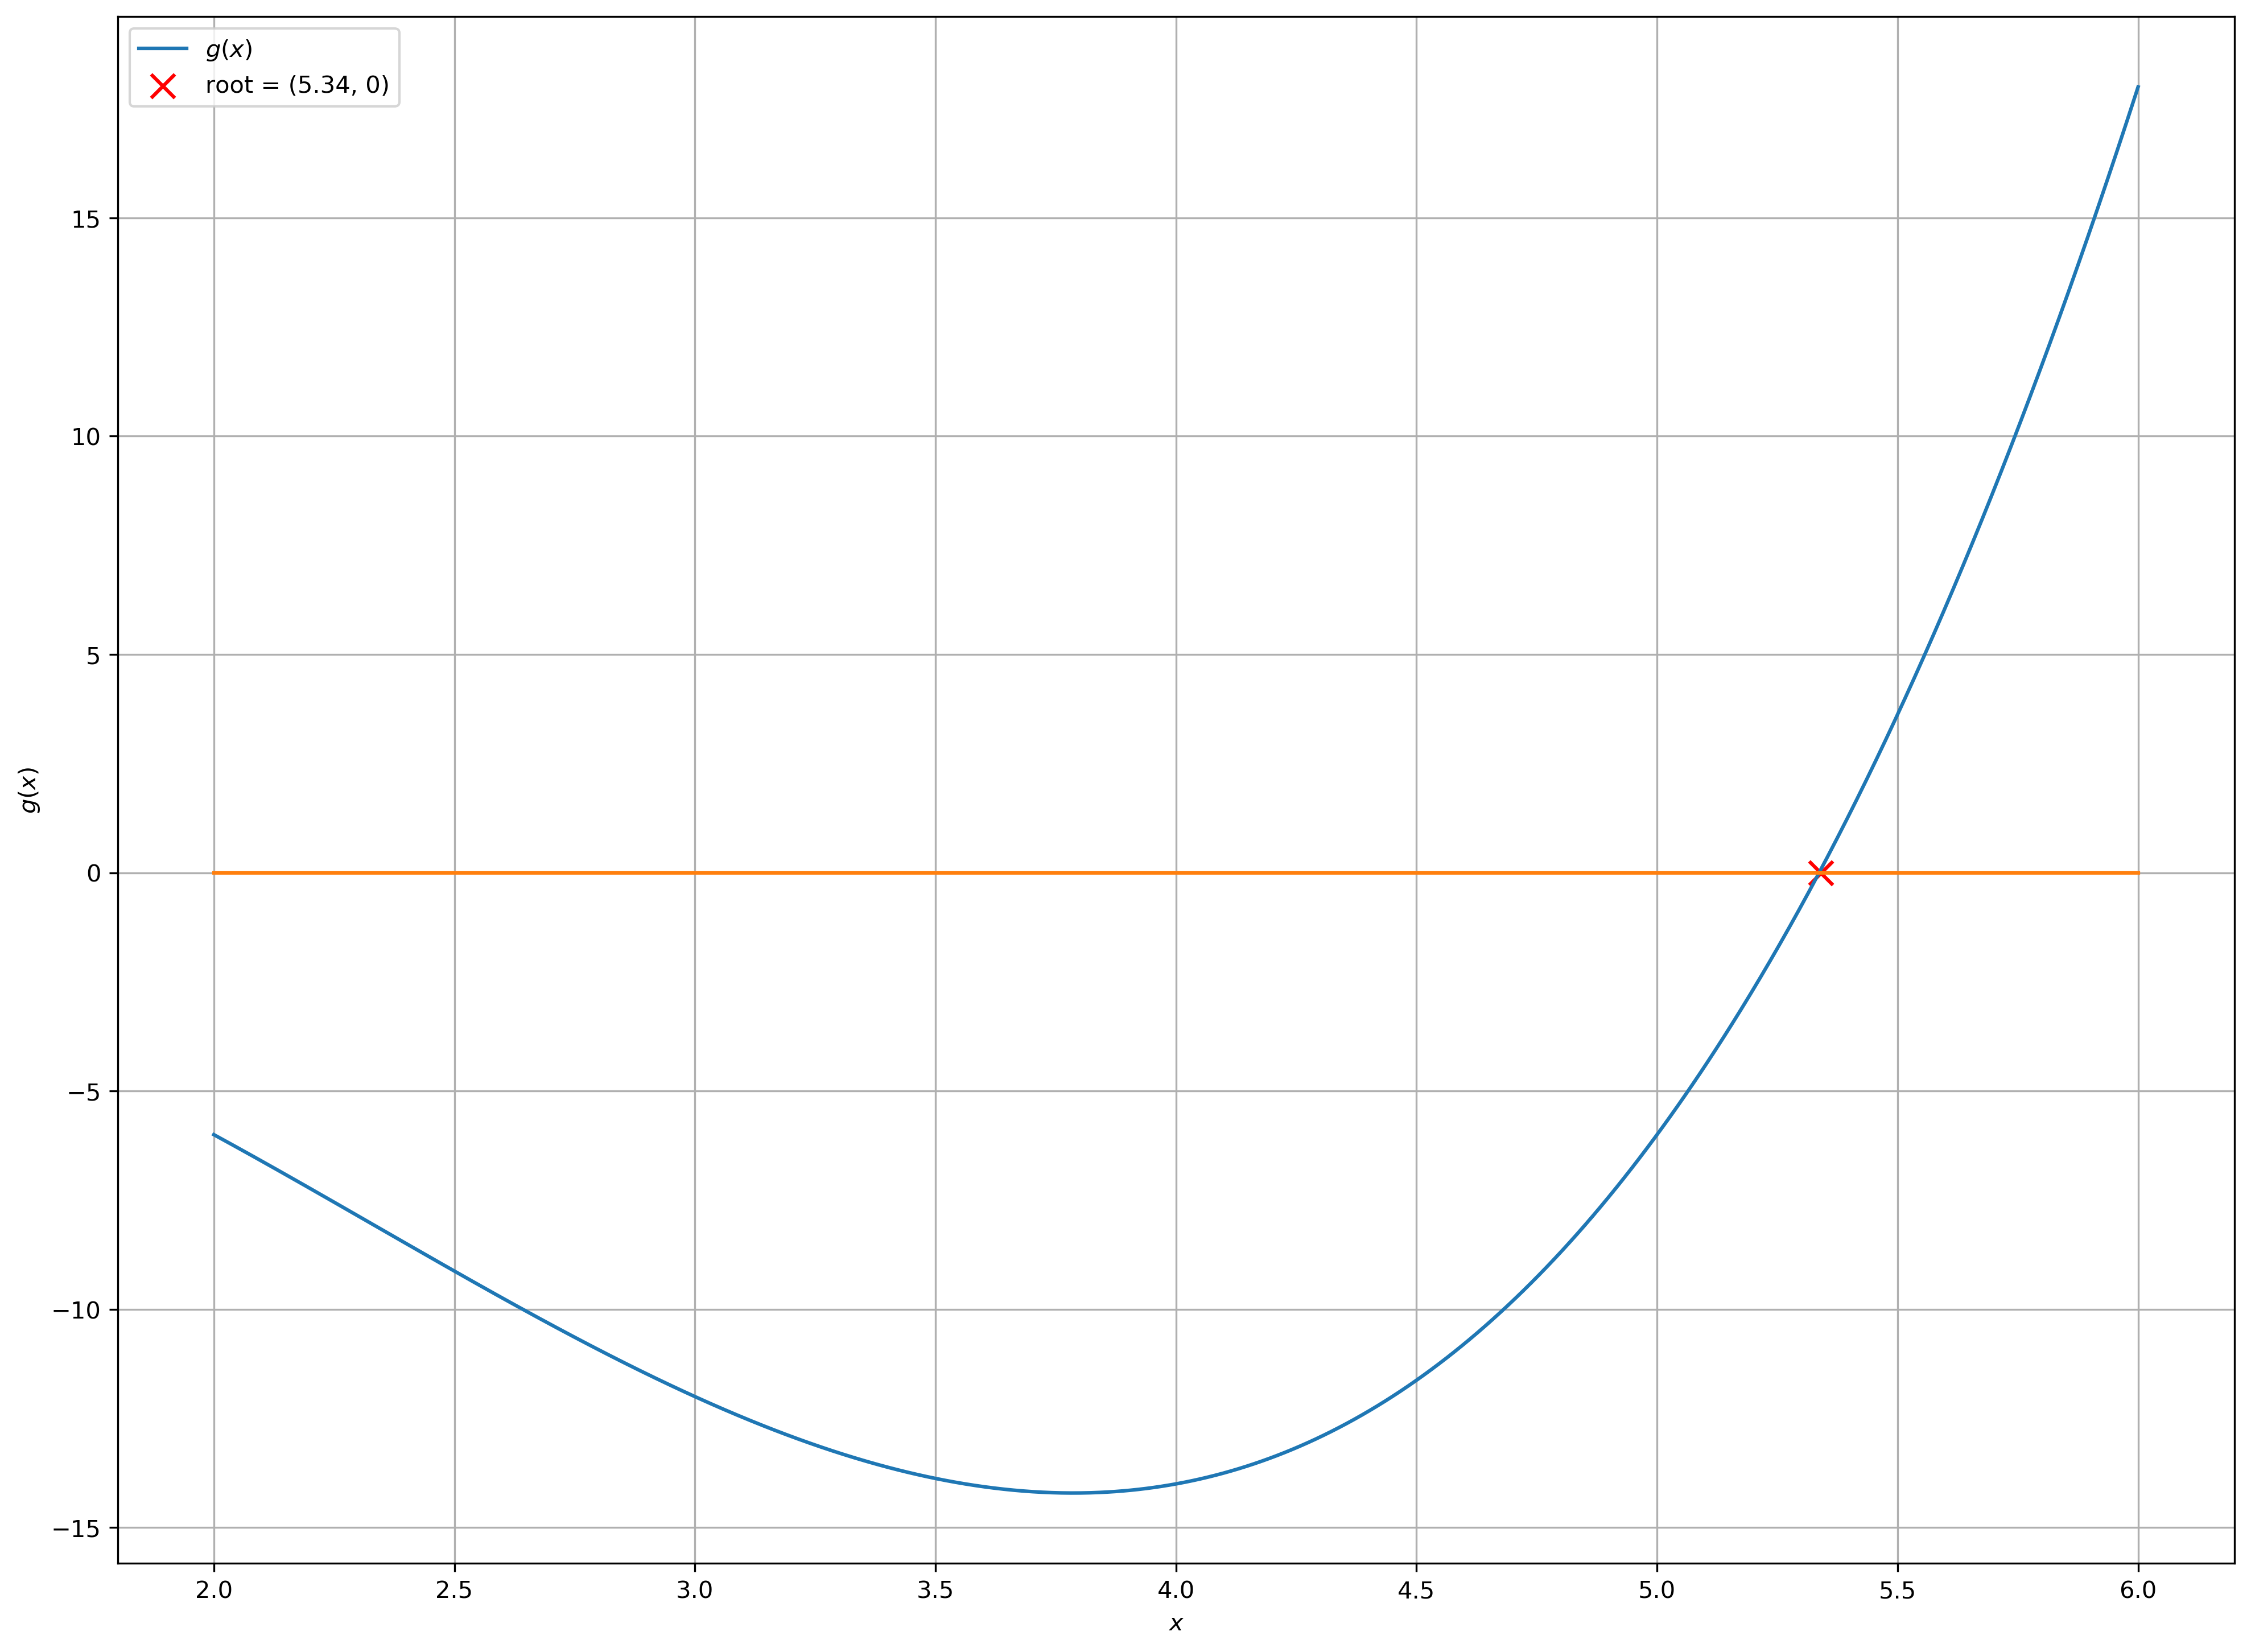

time: 1.92 s


<IPython.core.display.Javascript object>

In [11]:
x = np.linspace(2, 6, int(1e3))
plt.plot(x, g(x), label="$g(x)$")
plt.plot(x, np.zeros(x.shape))
plt.scatter(5.34, 0, c="r", marker="x", s=100, label="root = (5.34, 0)")
plt.ylabel("$g(x)$")
plt.xlabel("$x$")
plt.legend()
plt.grid(True)
plt.show()

### 9.20

Consider the function

\begin{align}
    f(x_1, x_2) &= ax^2_1 + bx^2_2 + cx_1 + dx_2,
\end{align}

with $a > 0$ and $b < 0$.

(a) Show that $f(x_1, x_2)$ has only one stationary point.

Gradient Vector:

\begin{align}
    g(x_1, x_2) &= \begin{bmatrix}
        2ax_1 + c \\
        2bx_2 + d
    \end{bmatrix} \\
\end{align}

First-order Stationarity condition:

\begin{align}
    g(x_1, x_2) &= 0 \\
    \begin{bmatrix}
        2ax_1 + c \\
        2bx_2 + d \\
    \end{bmatrix} 
    &= 
    \begin{bmatrix}
        0 \\
        0 \\
    \end{bmatrix} 
    \\
    \begin{bmatrix}
        x_1 \\
        x_2 \\
    \end{bmatrix} 
    &= 
    \begin{bmatrix}
        -\frac{c}{2a} \\
        -\frac{d}{2b} \\
    \end{bmatrix} \\
\end{align}

Hence, for fixed constants $a, b, c, d$, there is only one stationary point given by the formula above. $\blacksquare$

(b) Show that this stationary point is neither a minimizer nor maximizer for $f$.

Hessian Matrix:

\begin{align}
    G(x) &= \begin{bmatrix}
        2a & 0 \\
        0 & 2b \\
    \end{bmatrix} \\
\end{align}

As observed, since $a > 0, b < 0$, the Hessian has 1 positive eigenvalue $2a$, and 1 negative eigenvalue $2b$, meaning that it is neither positive semi-definite (all eigenvalues >= 0), nor positive definite (all eigenvalues > 0), nor negative definite (all eigenvalues < 0), nor negative semi-definite (all eigenvalues <= 0), and is classified as **indefinite** and is a **saddle point**, neither a minimizer or maximizer for $f$. $\blacksquare$ 

(c) With $a=1,b=−3,c=3,d=6$,draw a few contour lines of $f$.

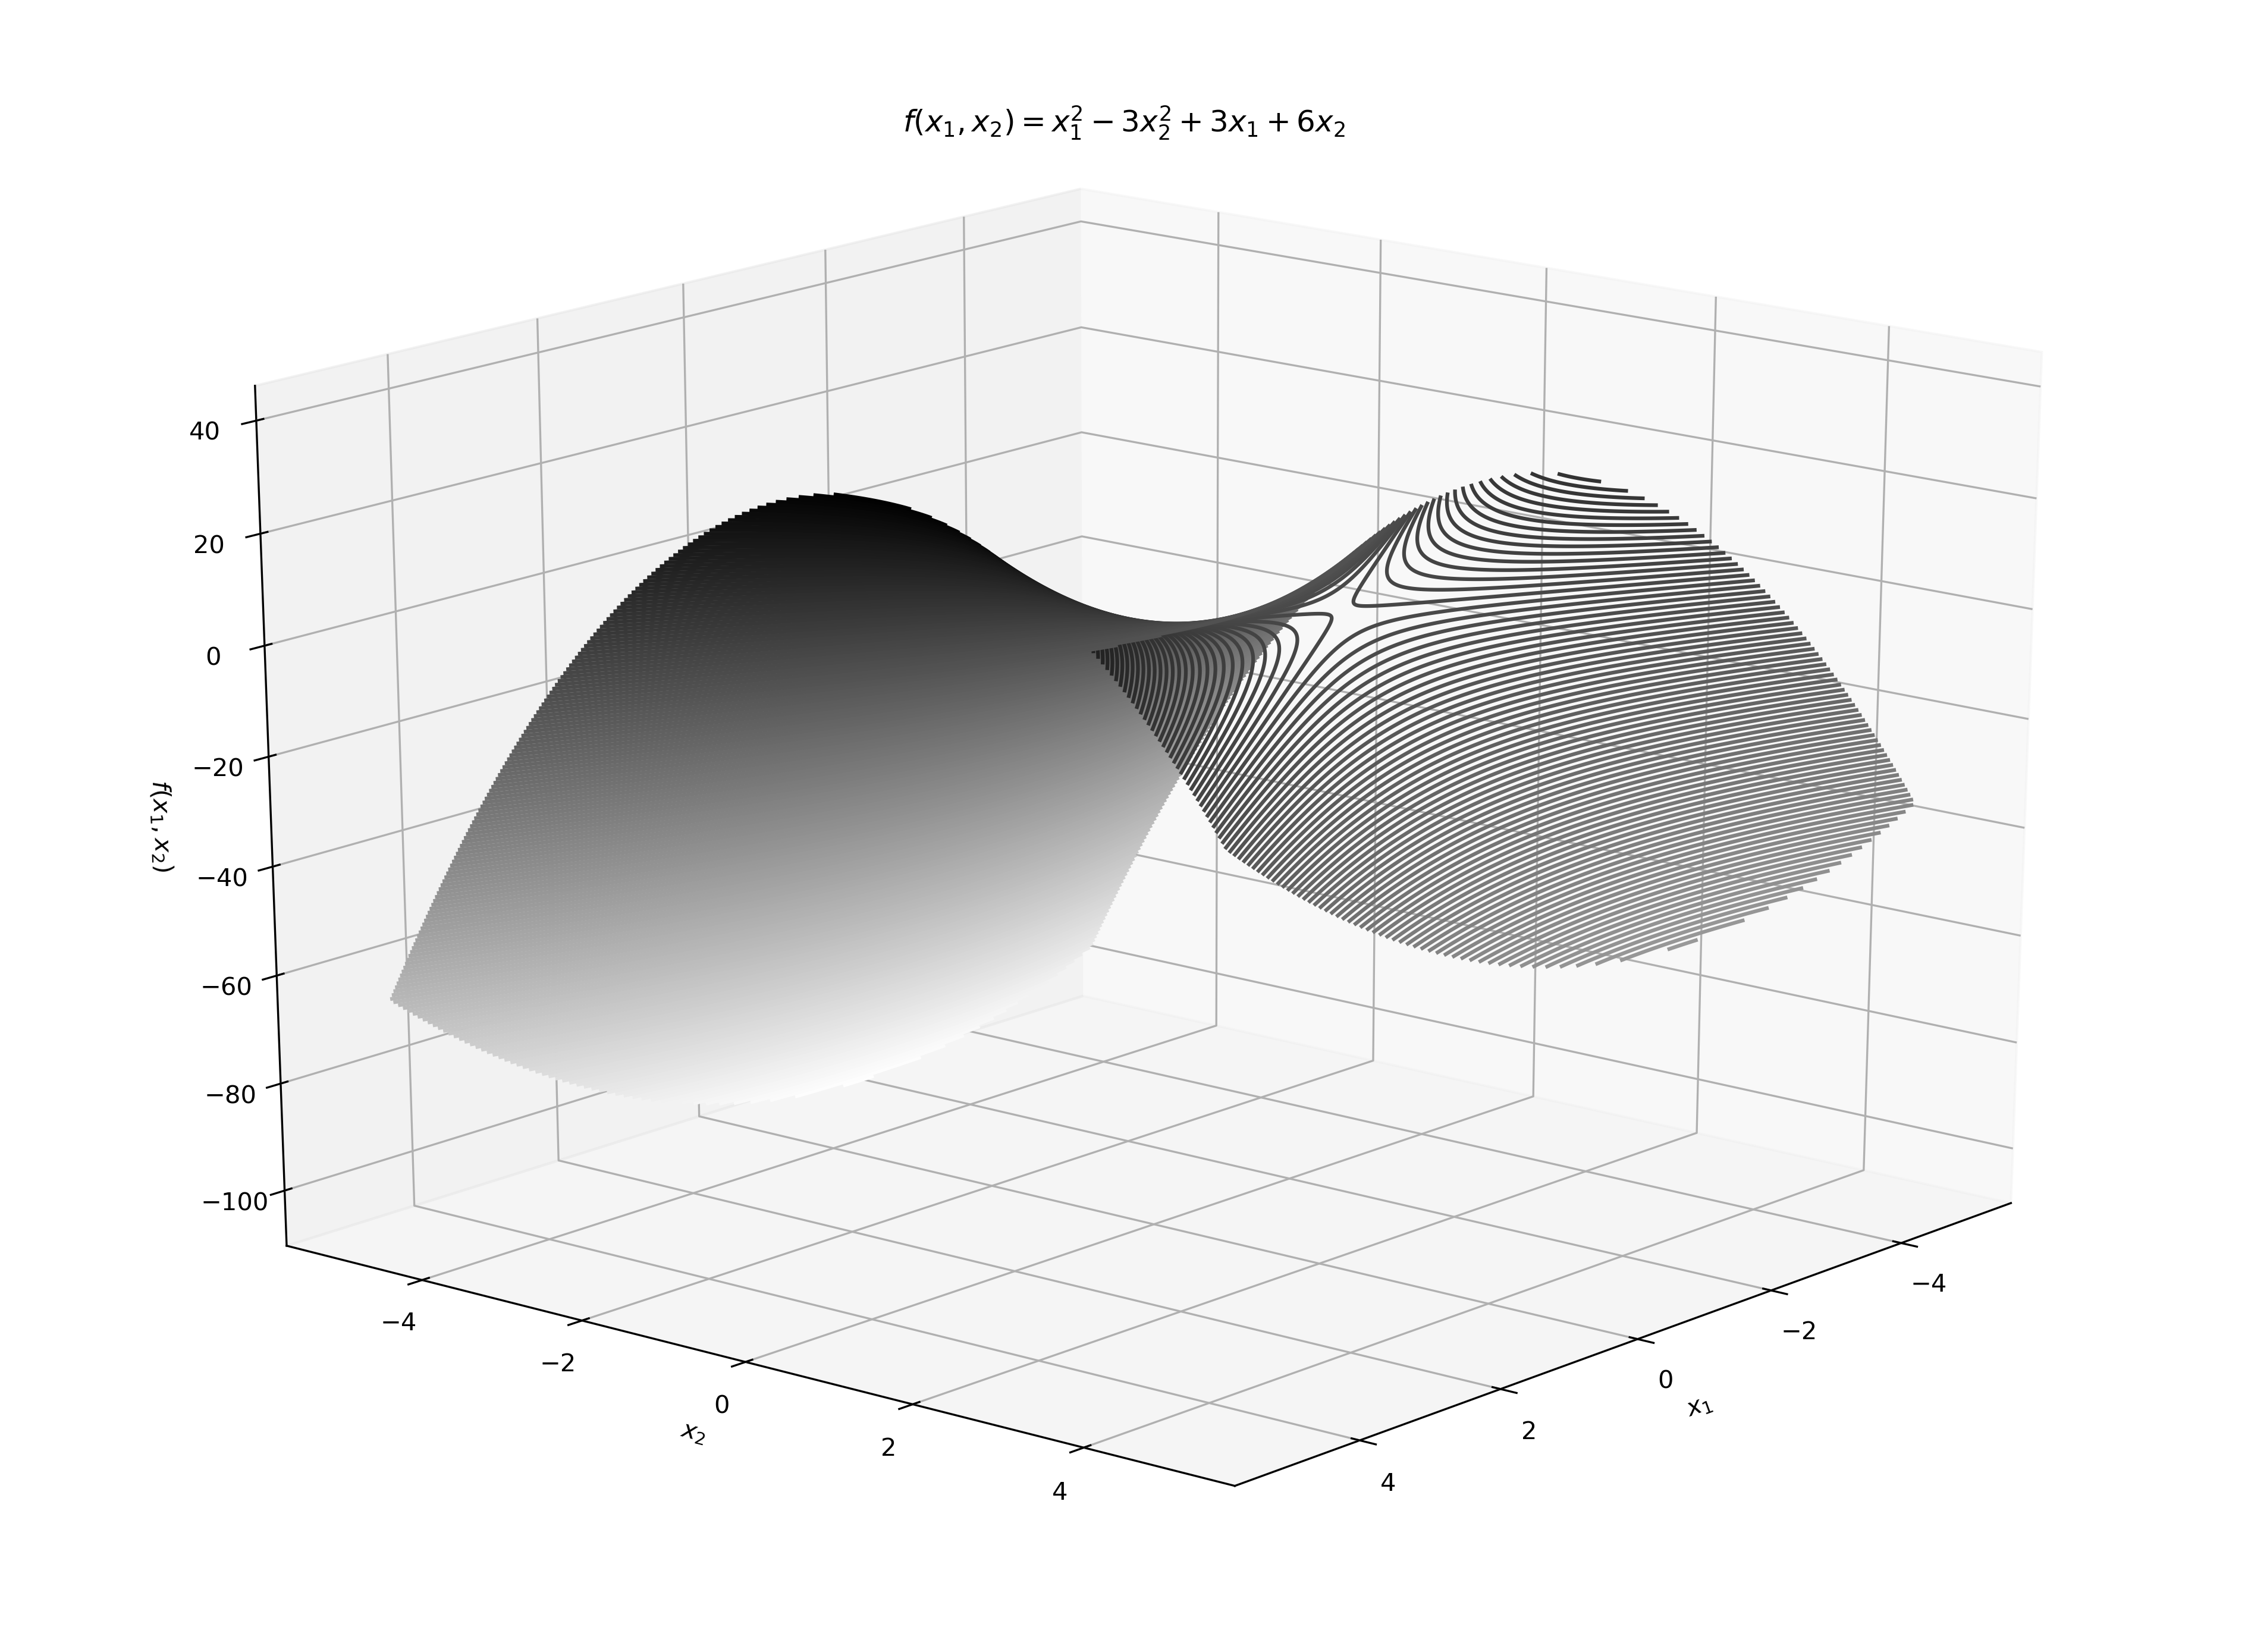

time: 6.08 s


<IPython.core.display.Javascript object>

In [12]:
f = (
    lambda x, a=1, b=-3, c=3, d=6: a * (x[0] ** 2)
    + b * (x[1] ** 2)
    + c * x[0]
    + d * x[1]
)

x_1, x_2 = np.linspace(-5, 5, 1000), np.linspace(-5, 5, 1000)
X, Y = np.meshgrid(x_1, x_2)
Z = f(x=[X, Y])
ax = plt.axes(projection="3d")
ax.view_init(20, 40)
ax.contour3D(X, Y, Z, 200, cmap="binary")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$f(x_1, x_2)$")
plt.title("$f(x_1, x_2) = x^2_1 -3x^2_2 + 3x_1 + 6x_2$")
plt.show()

### 9.21

(Based on Exercise 4 in Fletcher [68, p. 30].) The function $f(x_1, x_2) = x^5_1 +(x^2_1 − x_2)^2$ has only one stationary point (i.e., solution of $\nabla f(x_1, x_2) = 0$). Find it and show that it is neither a local maximizer nor a local minimizer.

Gradient Vector:

\begin{align}
    \nabla f(x_1, x_2) 
    &= 
    \begin{bmatrix}
        5x^4_1 + 4x^3_1 - 4x_1x_2 \\
        -2x^2_1 + 2x_2 \\
    \end{bmatrix} \\
\end{align}

First-order Stationarity condition:

\begin{align}
    \nabla f(x_1, x_2) 
    &= 0 \\
    \begin{bmatrix}
        5x^4_1 + 4x^3_1 - 4x_1x_2 \\
        -2x^2_1 + 2x_2 \\
    \end{bmatrix}
    &= 
    \begin{bmatrix}
        0 \\
        0 \\
    \end{bmatrix} 
    \\
    \text{Let }x_2 = x^2_1, 
    \\ 
    \begin{bmatrix}
        x_1 \\
        x_2 \\
    \end{bmatrix} 
    &= 
    \begin{bmatrix}
        0 \\
        0 \\
    \end{bmatrix} \\
\end{align}

Hessian Matrix:

\begin{align}
    \nabla^2 f(x_1, x_2) 
    &= 
    \begin{bmatrix}
        20x^3_1 + 12x^2_1 -4x_2 & -4x_1 \\
        -4x_1 & 2 \\
    \end{bmatrix} \\
\end{align}

At the stationary point:

\begin{align}
    \nabla^2 f(x_1, x_2) 
    &= 
    \begin{bmatrix}
        0 & 0 \\
        0 & 2 \\
    \end{bmatrix} \\
\end{align}

We have a positive semi-definite Hessian, which although satisfies the second order necessary conditions for optimality, it does not the sufficiency conditions for optimality (Hessian needs to be positive definite, not just positive semi-definite), which does means it is not a local minimizer.  

However, at the stationary point, $f(x_1=0, x_2=0) = 0$ and $f(x_1>0, x_2>0) > 0$ while $f(x_1<0, x_2<0) < 0$, meaning that it is neither a local minimizer or maximizer at the stationary point. $\blacksquare$

Coercivity: We also see that $x^5_1$ term dominates in $f$ at the extreme points of the function. As ($x_1 \rightarrow \infty / -\infty$ and $x_2 \rightarrow \infty / -\infty$), $x^5_1$ term dominates and if $x_1 \rightarrow \infty$, $f \rightarrow \infty$ and if $x_1 \rightarrow -\infty$, $f \rightarrow -\infty$.

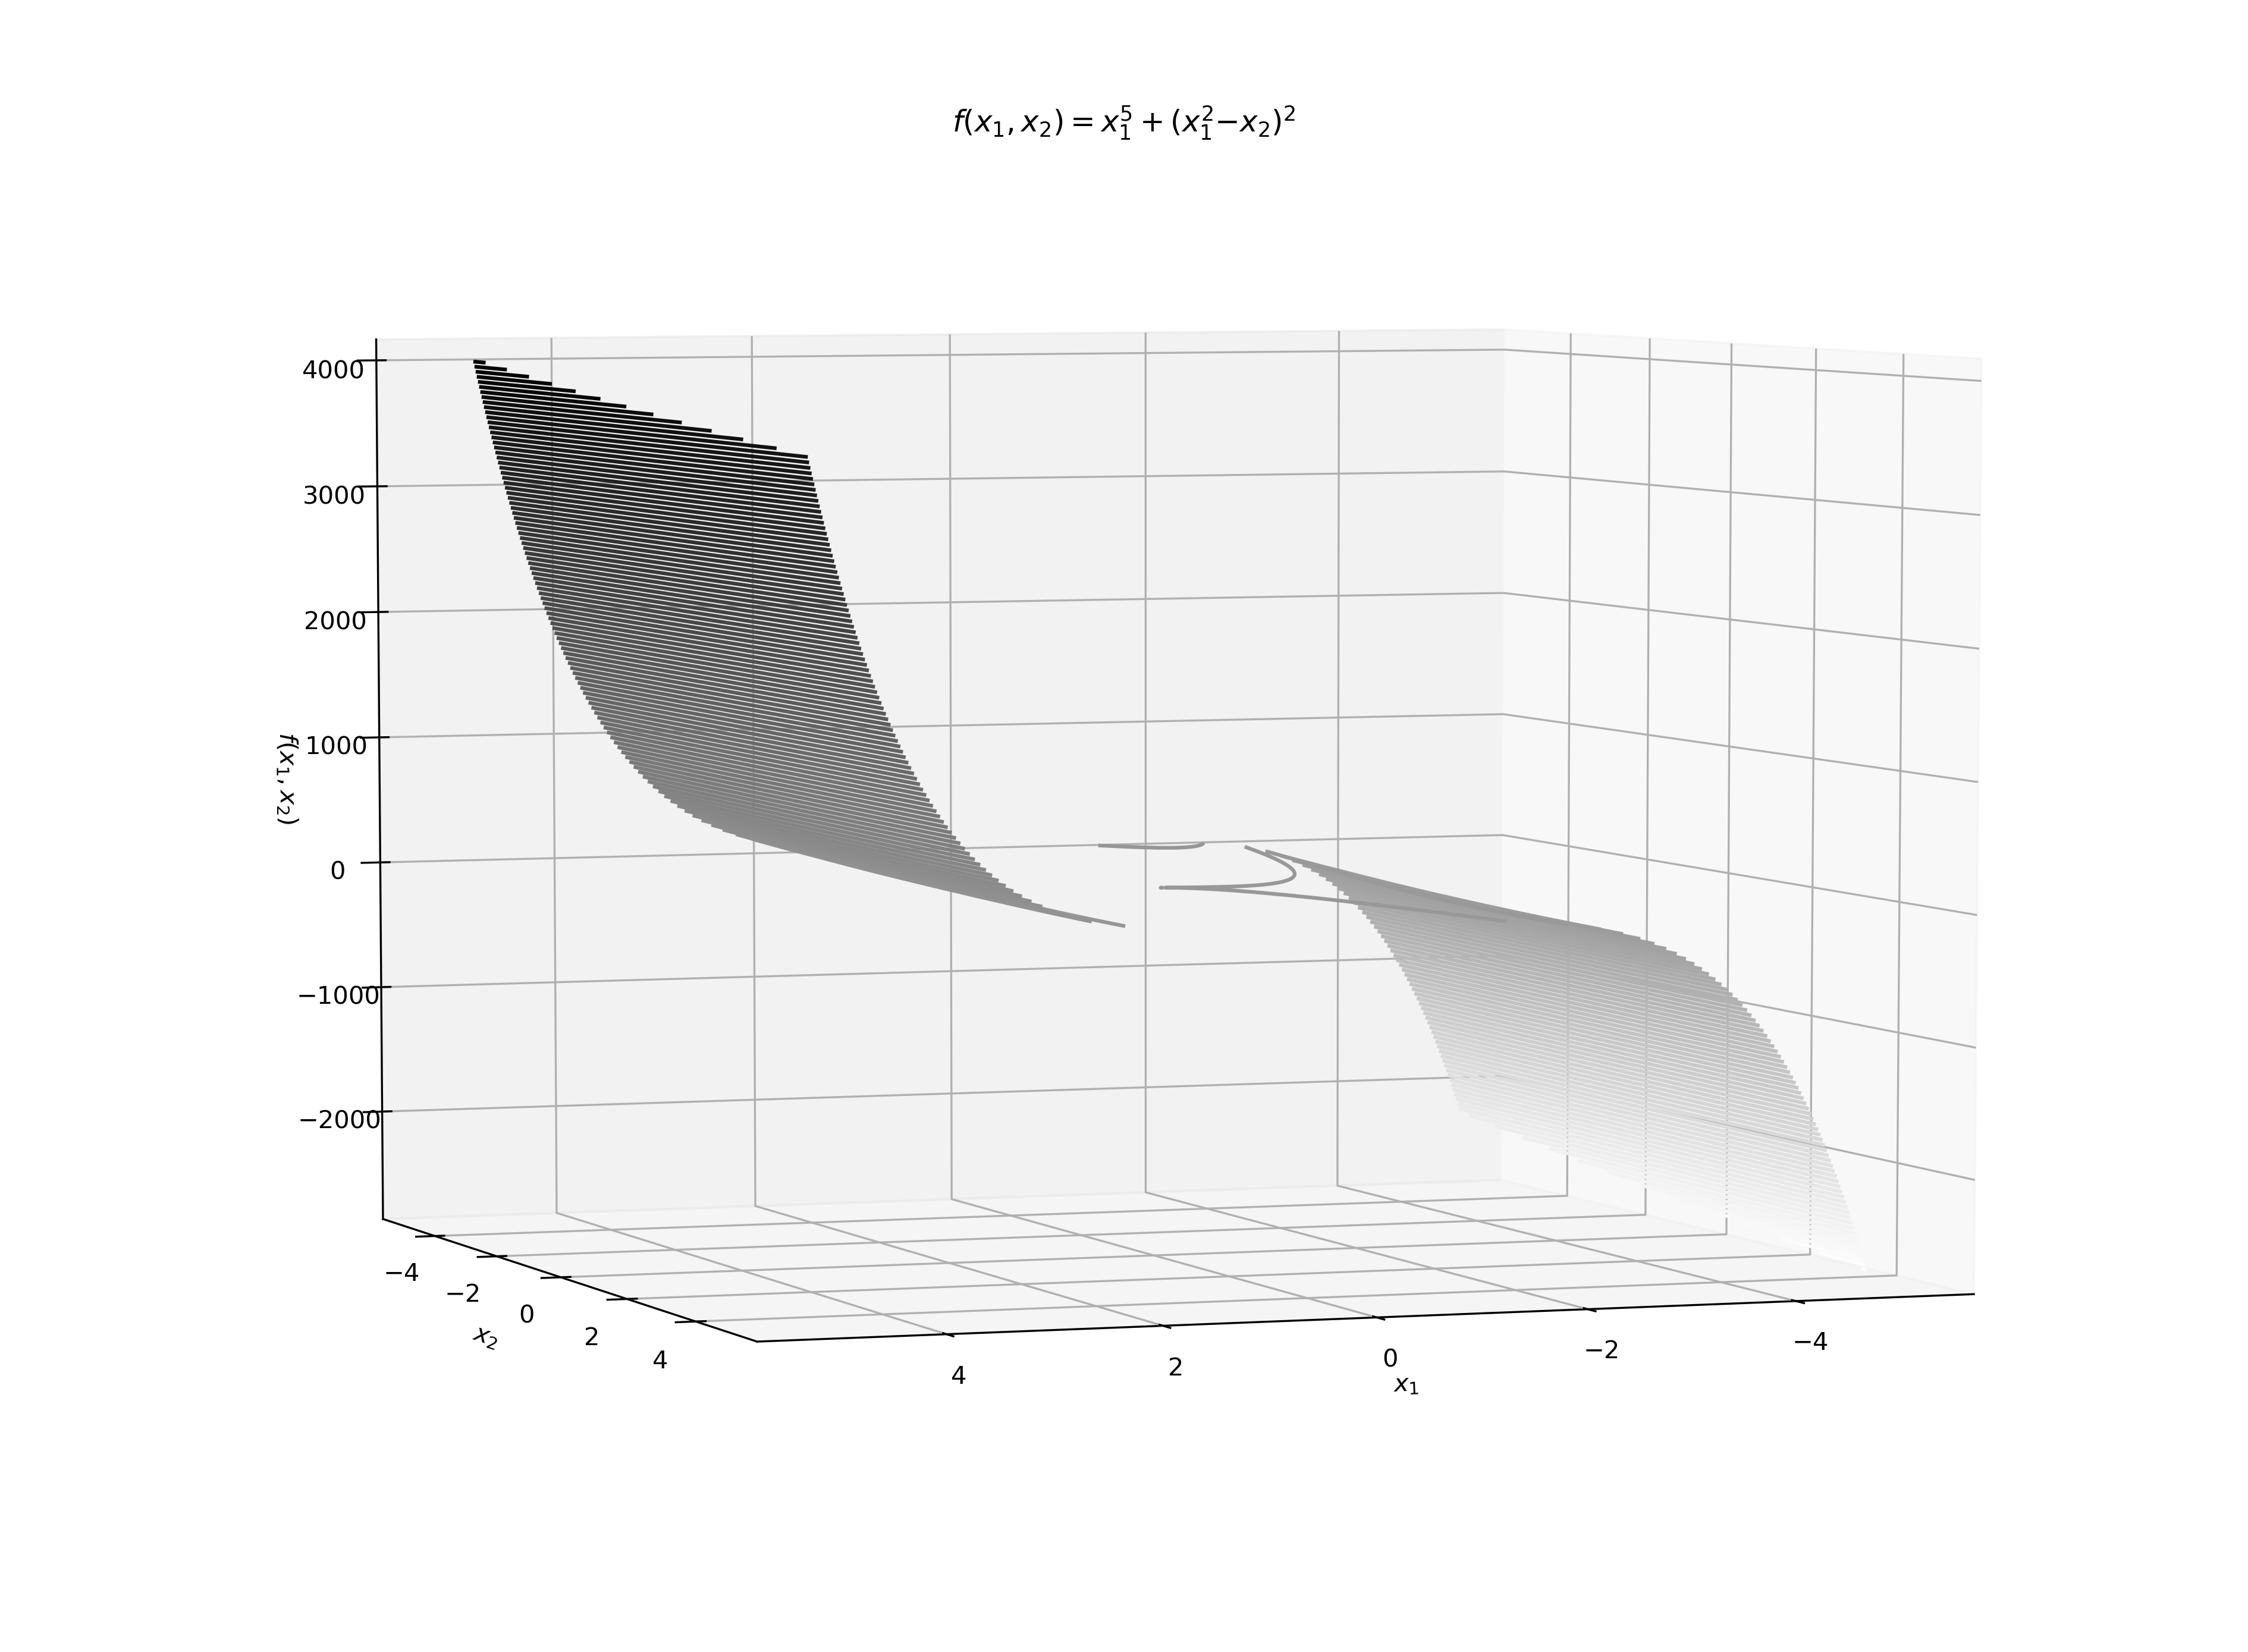

time: 5.31 s


<IPython.core.display.Javascript object>

In [13]:
f = lambda x: x[0] ** 5 + (x[0] ** 2 - x[1]) ** 2

x_1, x_2 = np.linspace(-5, 5, 1000), np.linspace(-5, 5, 1000)
X, Y = np.meshgrid(x_1, x_2)
Z = f(x=[X, Y])
ax = plt.axes(projection="3d")
ax.view_init(5, 70)
ax.contour3D(X, Y, Z, 200, cmap="binary")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$f(x_1, x_2)$")
plt.title("$f(x_1, x_2) = x^5_1 +(x^2_1 − x_2)^2$")
plt.show()

### 9.22

Find a global minimum of the function

\begin{align}
    f(x_1,x_2,x_3) &= 6x^2_1 + 4x^2_2 + 2x^2_3 + 2x_1x_2 + 2x_1x_3 + 2x_2x_3 − 11x_1 − 12x_2 − 9x_3.
\end{align}

Gradient Vector:

\begin{align}
    \nabla f(x_1, x_2, x_3) 
    &= 
    \begin{bmatrix}
        12x_1 + 2x_2 + 2x_3 -11 \\
        8x_2 + 2x_1 + 2x_3 - 12 \\
        4x_3 + 2x_1 + 2x_2 - 9 \\
    \end{bmatrix} \\
\end{align}

First-order Stationarity condition:

\begin{align}
    \nabla f(x_1, x_2, x_3)
    &= 0 \\
    \begin{bmatrix}
        12x_1 + 2x_2 + 2x_3 -11 \\
        8x_2 + 2x_1 + 2x_3 - 12 \\
        4x_3 + 2x_1 + 2x_2 - 9 \\
    \end{bmatrix}
    &= 
    \begin{bmatrix}
        0 \\
        0 \\
        0 \\
    \end{bmatrix} 
    \\
    \begin{bmatrix}
        12 & 2 & 2 \\
        2 & 8 & 2 \\
        2 & 2 & 4 \\
    \end{bmatrix}
    \begin{bmatrix}
        x_1 \\
        x_2 \\
        x_3 \\
    \end{bmatrix} 
    &= 
    \begin{bmatrix}
        11 \\
        12 \\
        9 \\
    \end{bmatrix} 
    \\
    \begin{bmatrix}
        x_1 \\
        x_2 \\
        x_3 \\
    \end{bmatrix}
    &=
    \begin{bmatrix}
        12 & 2 & 2 \\
        2 & 8 & 2 \\
        2 & 2 & 4 \\
    \end{bmatrix}^{-1}
    \begin{bmatrix}
        11 \\
        12 \\
        9 \\
    \end{bmatrix} \\
    \begin{bmatrix}
        x_1 \\
        x_2 \\
        x_3 \\
    \end{bmatrix}
    &=
    \begin{bmatrix}
        0.5 \\
        1 \\
        1.5 \\
    \end{bmatrix}
\end{align}

Hessian Matrix:

\begin{align}
    \nabla^2 f(x_1, x_2, x_3) 
    &= 
    \begin{bmatrix}
        12 & 2 & 2 \\
        2 & 8 & 2 \\
        2 & 2 & 4 \\
    \end{bmatrix} \\
\end{align}

In [14]:
np.linalg.eigvals(np.array([[12, 2, 2], [2, 8, 2], [2, 2, 4]]))

array([13.55691424,  7.42166291,  3.02142286])

time: 3.95 ms


<IPython.core.display.Javascript object>

Since all the eigenvalues $\lambda$ of the Hessian matrix are positive, **regardless of which point $x_1, x_2, x_3$**, we have a positive definite Hessian and hence, **strictly convex** with 1 global minimum (ordinarily, if the Hessian is just positive definite at that point thenit'll just be a strict local minimizer), which is the single  stationary point we found.

In [15]:
f = (
    lambda x: 6 * (x[0] ** 2)
    + 4 * (x[1] ** 2)
    + 2 * (x[2] ** 2)
    + 2 * x[0] * x[1]
    + 2 * x[0] * x[2]
    + 2 * x[1] * x[2]
    - 11 * x[0]
    - 12 * x[1]
    - 9 * x[2]
)

optimize.minimize(fun=f, x0=np.zeros((3,)))

      fun: -15.499999999996737
 hess_inv: array([[ 0.0921055 , -0.01317824, -0.03944193],
       [-0.01317824,  0.14513135, -0.06639581],
       [-0.03944193, -0.06639581,  0.30356681]])
      jac: array([ 1.43051147e-06, -3.81469727e-06,  3.09944153e-06])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 8
     njev: 10
   status: 0
  success: True
        x: array([0.50000005, 0.99999923, 1.50000113])

time: 8.72 ms


<IPython.core.display.Javascript object>

Global minimum: -15.5

---
## Chapter 10

### 10.5

Define the function

\begin{align}
    f_c(x) &= cx^2_1 + x^2_2.
\end{align}

/opt/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: The following kwargs were not used by contour: 'label'
  if sys.path[0] == '':
No handles with labels found to put in legend.


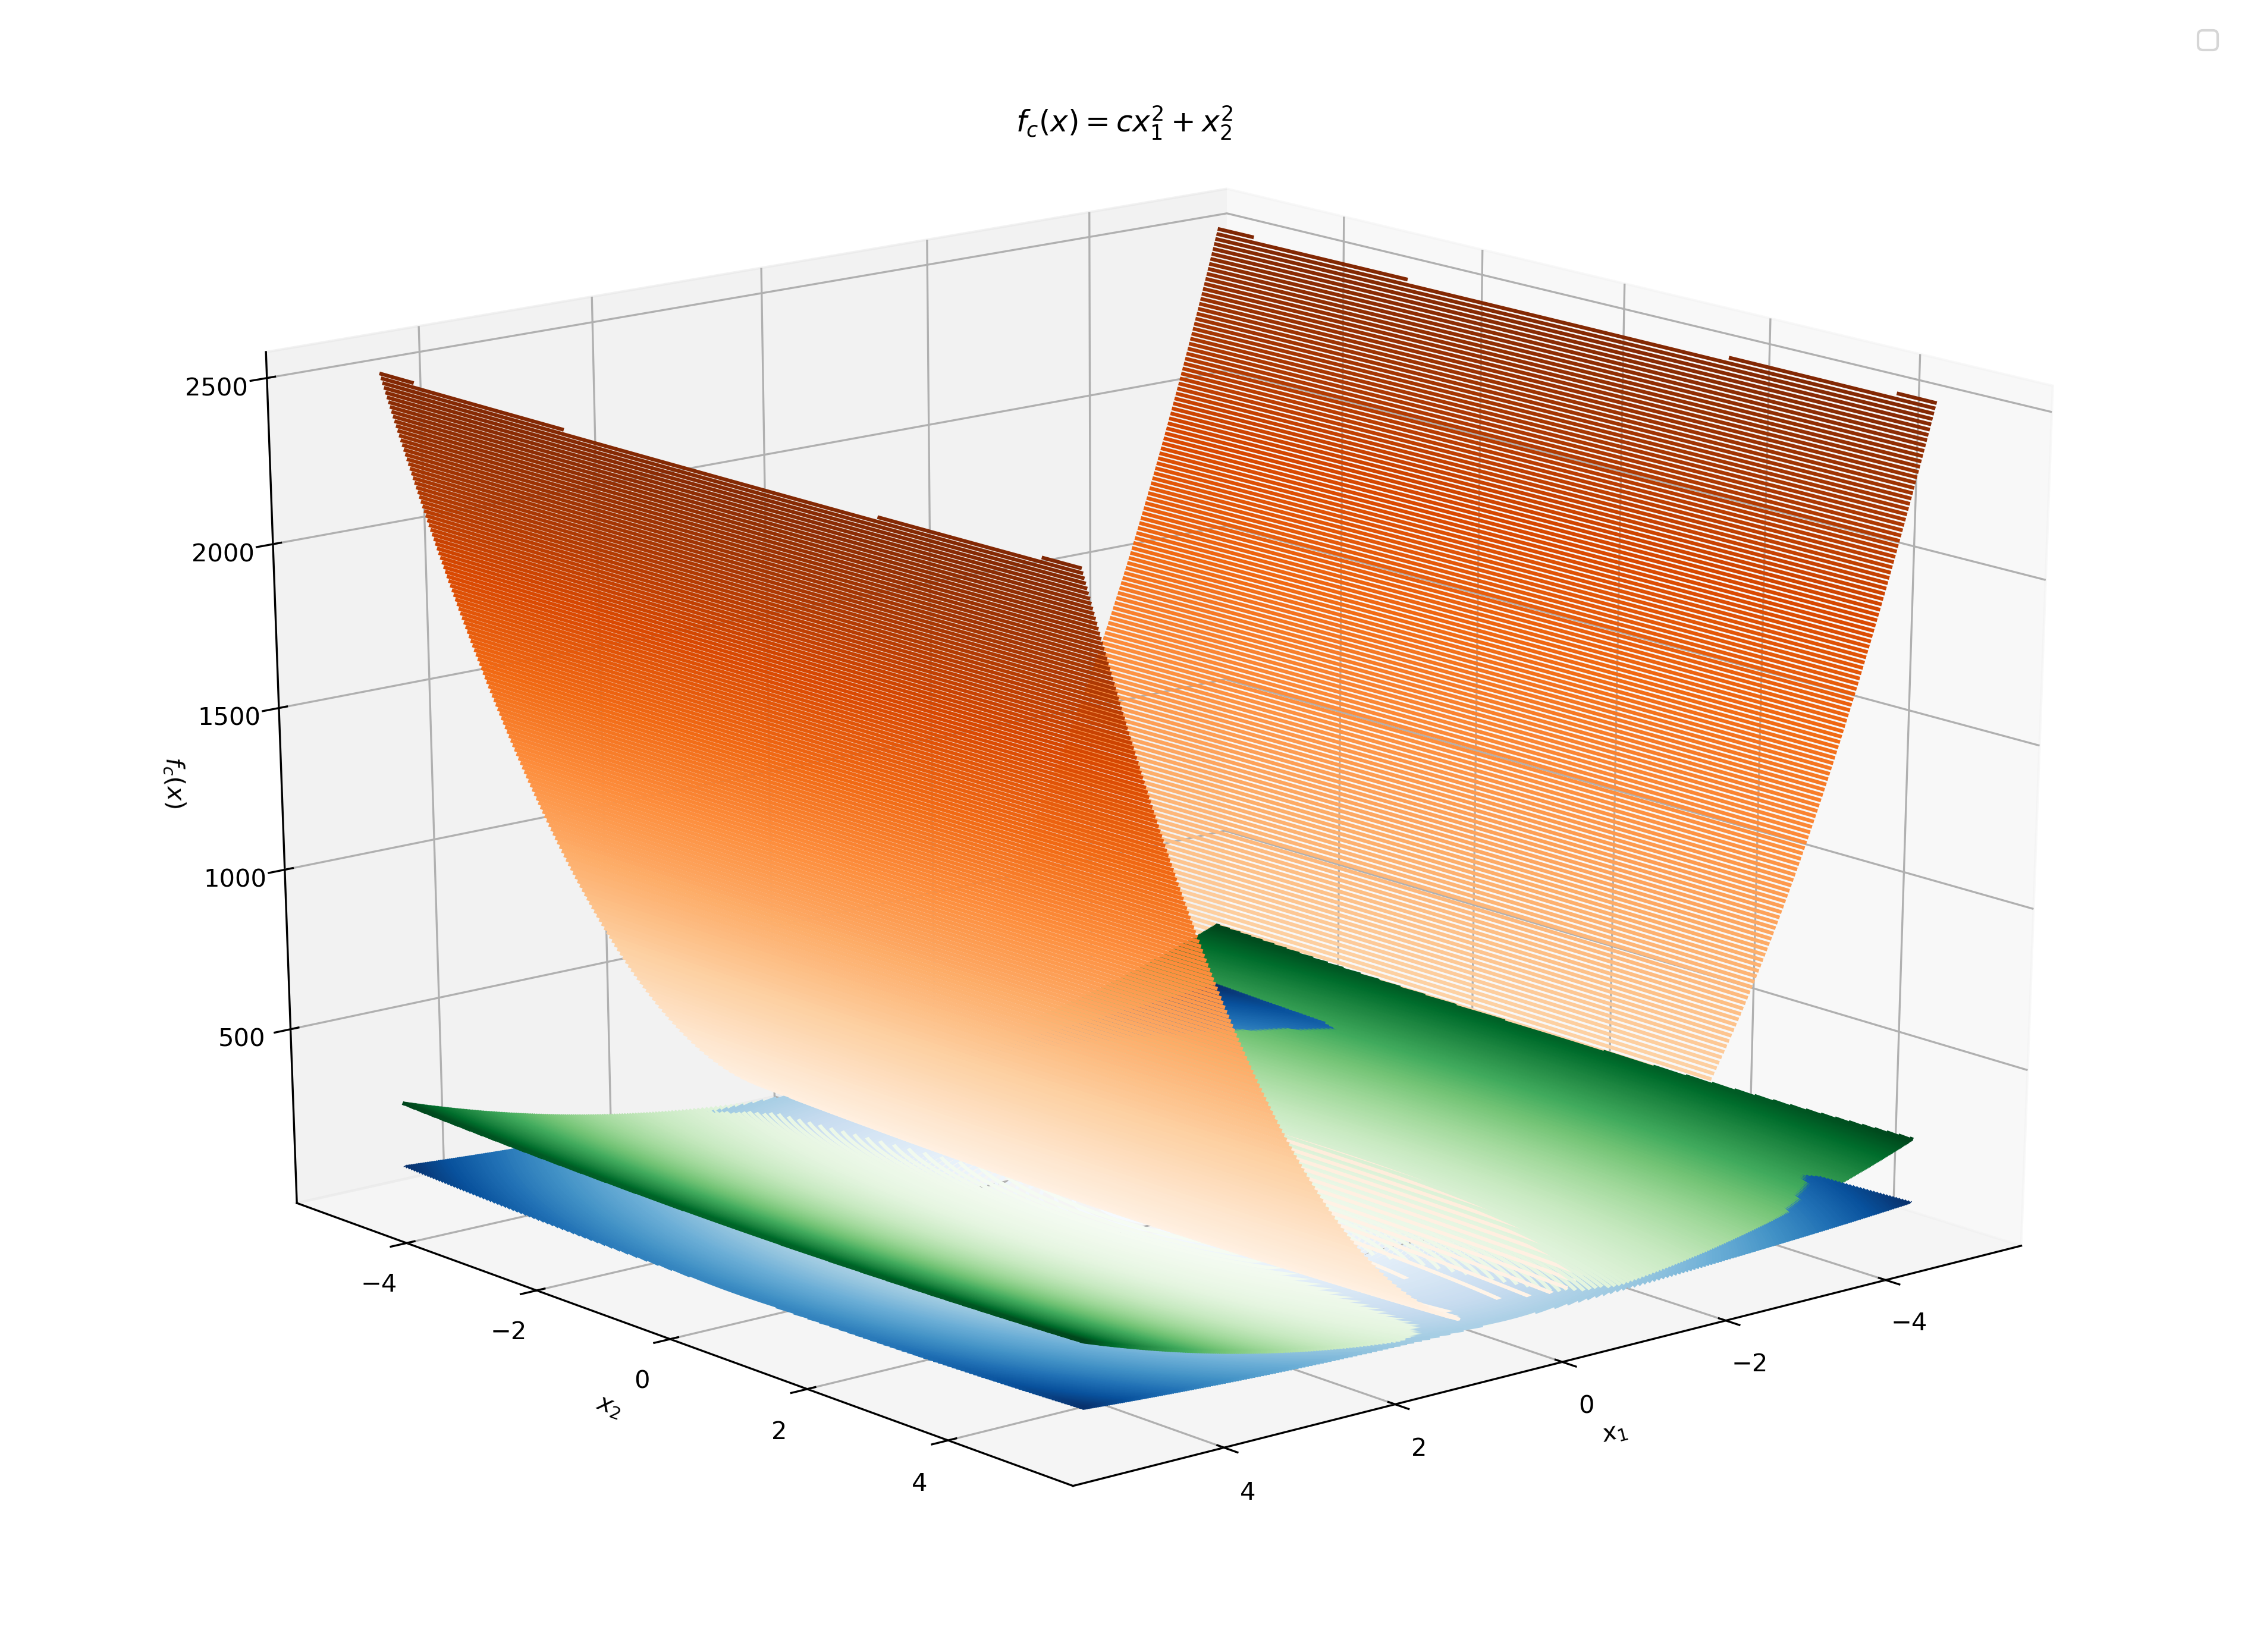

time: 17 s


<IPython.core.display.Javascript object>

In [16]:
f = lambda x, c: c * x[0] ** 2 + x[1] ** 2
f_prime = lambda x, c: np.array([2 * c * x[0], 2 * x[1]])
hessian = lambda x, c: np.array([[2 * c, 0], [0, 2]])
c_vals = [2, 10, 100]

x_1, x_2 = np.linspace(-5, 5, 1000), np.linspace(-5, 5, 1000)
X, Y = np.meshgrid(x_1, x_2)
Z = {c: f(x=[X, Y], c=c) for c in c_vals}
ax = plt.axes(projection="3d")
ax.view_init(20, 50)
for c, cmap in zip(c_vals, ["Blues", "Greens", "Oranges"]):
    ax.contour3D(X, Y, Z[c], 200, cmap=cmap, label=f"$f_{c}(x) = {c}x^2_1 + x^2_2$")
ax.legend()
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$f_c(x)$")
plt.title("$f_c(x) = cx^2_1 + x^2_2$")
plt.show()

(a) Starting with the point $x = (10, 10)^\top$ , carry out three iterations of the Steepest-descent Method to minimize $f_c(x)$ when $c = 2, c = 10,$ and $c = 100$.

In [17]:
def simple_steplength(f, f_prime, x_k, p_k, μ=1e-4):
    # 1. Set α=1.
    α = 1
    while True:
        # 2. If f(xk+αpk) ≤ f(xk)+μαgkpk, set αk=α and stop.
        if f(x_k + α * p_k) <= f(x_k) + μ * α * f_prime(x_k).T @ p_k:
            return α
        else:
            # 3. Set α=α/2 and go to Step2.
            α /= 2


def steepest_descent(f, f_prime, x_0, ε=1e-15, steplength_algo=simple_steplength):
    k, x_k = 0, x_0
    while True:

        # 1. Test for Convergence
        if np.allclose(f_prime(x_k), 0, rtol=ε):
            return x_k

        # 2. Compute a search direction
        p_k = -f_prime(x_k)

        # 3. Compute a steplength
        α_k = steplength_algo(f=f, f_prime=f_prime, x_k=x_k, p_k=p_k, μ=1e-4)

        print(
            f"Iteration: {k} - x_{k} = {np.round(x_k, 5)}, p_k = {np.round(p_k, 5)}, α_k = {np.round(α_k, 5)}"
        )

        # 4. Update the iterate and return to Step 1
        k += 1
        x_k += α_k * p_k

        # Check for divergence
        if np.allclose(x_k, x_k + α_k * p_k) and k > 1:
            print("Series diverged.")
            break

time: 2.47 ms


<IPython.core.display.Javascript object>

In [18]:
c = 2
print(f"Steepest Descent with c={c}:")
print("=" * 30)
steepest_descent(
    f=functools.partial(f, c=c),
    f_prime=functools.partial(f_prime, c=c),
    x_0=np.array([10.0, 10.0]),
    ε=1e-15,
)

Steepest Descent with c=2:
Iteration: 0 - x_0 = [10. 10.], p_k = [-40. -20.], α_k = 0.5
Iteration: 1 - x_1 = [-10.   0.], p_k = [40. -0.], α_k = 0.25


array([0., 0.])

time: 4.93 ms


<IPython.core.display.Javascript object>

In [19]:
c = 10
print(f"Steepest Descent with c={c}:")
print("=" * 30)
steepest_descent(
    f=functools.partial(f, c=c),
    f_prime=functools.partial(f_prime, c=c),
    x_0=np.array([10.0, 10.0]),
    ε=1e-15,
)

Steepest Descent with c=10:
Iteration: 0 - x_0 = [10. 10.], p_k = [-200.  -20.], α_k = 0.0625
Iteration: 1 - x_1 = [-2.5   8.75], p_k = [ 50.  -17.5], α_k = 0.0625
Iteration: 2 - x_2 = [0.625   7.65625], p_k = [-12.5    -15.3125], α_k = 0.125
Iteration: 3 - x_3 = [-0.9375   5.74219], p_k = [ 18.75    -11.48438], α_k = 0.125
Iteration: 4 - x_4 = [1.40625 4.30664], p_k = [-28.125    -8.61328], α_k = 0.0625
Iteration: 5 - x_5 = [-0.35156  3.76831], p_k = [ 7.03125 -7.53662], α_k = 0.125
Iteration: 6 - x_6 = [0.52734 2.82623], p_k = [-10.54688  -5.65247], α_k = 0.125
Iteration: 7 - x_7 = [-0.79102  2.11967], p_k = [15.82031 -4.23935], α_k = 0.0625
Iteration: 8 - x_8 = [0.19775 1.85472], p_k = [-3.95508 -3.70943], α_k = 0.125
Iteration: 9 - x_9 = [-0.29663  1.39104], p_k = [ 5.93262 -2.78207], α_k = 0.0625
Iteration: 10 - x_10 = [0.07416 1.21716], p_k = [-1.48315 -2.43431], α_k = 0.25
Iteration: 11 - x_11 = [-0.29663  0.60858], p_k = [ 5.93262 -1.21716], α_k = 0.0625
Iteration: 12 - x_12 = 

<IPython.core.display.Javascript object>

In [20]:
c = 100
print(f"Steepest Descent with c={c}:")
print("=" * 30)
steepest_descent(
    f=functools.partial(f, c=c),
    f_prime=functools.partial(f_prime, c=c),
    x_0=np.array([10.0, 10.0]),
    ε=1e-15,
)

Steepest Descent with c=100:
Iteration: 0 - x_0 = [10. 10.], p_k = [-2000.   -20.], α_k = 0.00781
Iteration: 1 - x_1 = [-5.625    9.84375], p_k = [1125.      -19.6875], α_k = 0.00781
Iteration: 2 - x_2 = [3.16406 9.68994], p_k = [-632.8125   -19.37988], α_k = 0.00781
Iteration: 3 - x_3 = [-1.77979  9.53854], p_k = [355.95703 -19.07707], α_k = 0.00781
Iteration: 4 - x_4 = [1.00113 9.3895 ], p_k = [-200.22583  -18.77899], α_k = 0.00781
Iteration: 5 - x_5 = [-0.56314  9.24279], p_k = [112.62703 -18.48557], α_k = 0.00781
Iteration: 6 - x_6 = [0.31676 9.09837], p_k = [-63.3527  -18.19673], α_k = 0.00781
Iteration: 7 - x_7 = [-0.17818  8.95621], p_k = [ 35.6359  -17.91241], α_k = 0.00781
Iteration: 8 - x_8 = [0.10023 8.81626], p_k = [-20.04519 -17.63253], α_k = 0.01562
Iteration: 9 - x_9 = [-0.21298  8.54076], p_k = [ 42.59603 -17.08151], α_k = 0.00781
Iteration: 10 - x_10 = [0.1198  8.40731], p_k = [-23.96027 -16.81461], α_k = 0.00781
Iteration: 11 - x_11 = [-0.06739  8.27594], p_k = [ 13.4

Iteration: 109 - x_109 = [-0.01017  0.91759], p_k = [ 2.03383 -1.83519], α_k = 0.01562
Iteration: 110 - x_110 = [0.02161 0.88892], p_k = [-4.32189 -1.77784], α_k = 0.00781
Iteration: 111 - x_111 = [-0.01216  0.87503], p_k = [ 2.43106 -1.75006], α_k = 0.00781
Iteration: 112 - x_112 = [0.00684 0.86136], p_k = [-1.36747 -1.72272], α_k = 0.01562
Iteration: 113 - x_113 = [-0.01453  0.83444], p_k = [ 2.90588 -1.66888], α_k = 0.00781
Iteration: 114 - x_114 = [0.00817 0.8214 ], p_k = [-1.63456 -1.6428 ], α_k = 0.01562
Iteration: 115 - x_115 = [-0.01737  0.79573], p_k = [ 3.47343 -1.59147], α_k = 0.00781
Iteration: 116 - x_116 = [0.00977 0.7833 ], p_k = [-1.95381 -1.5666 ], α_k = 0.01562
Iteration: 117 - x_117 = [-0.02076  0.75882], p_k = [ 4.15184 -1.51764], α_k = 0.00781
Iteration: 118 - x_118 = [0.01168 0.74697], p_k = [-2.33541 -1.49393], α_k = 0.00781
Iteration: 119 - x_119 = [-0.00657  0.73529], p_k = [ 1.31367 -1.47059], α_k = 0.01562
Iteration: 120 - x_120 = [0.01396 0.71232], p_k = [-2

Iteration: 208 - x_208 = [0.00086 0.10015], p_k = [-0.17264 -0.2003 ], α_k = 0.01562
Iteration: 209 - x_209 = [-0.00183  0.09702], p_k = [ 0.36686 -0.19404], α_k = 0.00781
Iteration: 210 - x_210 = [0.00103 0.0955 ], p_k = [-0.20636 -0.19101], α_k = 0.01562
Iteration: 211 - x_211 = [-0.00219  0.09252], p_k = [ 0.43851 -0.18504], α_k = 0.00781
Iteration: 212 - x_212 = [0.00123 0.09107], p_k = [-0.24666 -0.18215], α_k = 0.00781
Iteration: 213 - x_213 = [-0.00069  0.08965], p_k = [ 0.13875 -0.1793 ], α_k = 0.01562
Iteration: 214 - x_214 = [0.00147 0.08685], p_k = [-0.29484 -0.1737 ], α_k = 0.00781
Iteration: 215 - x_215 = [-0.00083  0.08549], p_k = [ 0.16585 -0.17098], α_k = 0.01562
Iteration: 216 - x_216 = [0.00176 0.08282], p_k = [-0.35242 -0.16564], α_k = 0.00781
Iteration: 217 - x_217 = [-0.00099  0.08153], p_k = [ 0.19824 -0.16305], α_k = 0.01562
Iteration: 218 - x_218 = [0.00211 0.07898], p_k = [-0.42125 -0.15796], α_k = 0.00781
Iteration: 219 - x_219 = [-0.00118  0.07774], p_k = [ 0

Iteration: 327 - x_327 = [-0.00012  0.00691], p_k = [ 0.0231  -0.01381], α_k = 0.00781
Iteration: 328 - x_328 = [6.0e-05 6.8e-03], p_k = [-0.01299 -0.0136 ], α_k = 0.01562
Iteration: 329 - x_329 = [-0.00014  0.00659], p_k = [ 0.02761 -0.01317], α_k = 0.00781
Iteration: 330 - x_330 = [8.00e-05 6.48e-03], p_k = [-0.01553 -0.01297], α_k = 0.01562
Iteration: 331 - x_331 = [-0.00016  0.00628], p_k = [ 0.033   -0.01256], α_k = 0.00781
Iteration: 332 - x_332 = [9.00e-05 6.18e-03], p_k = [-0.01856 -0.01237], α_k = 0.00781
Iteration: 333 - x_333 = [-5.00e-05  6.09e-03], p_k = [ 0.01044 -0.01217], α_k = 0.01562
Iteration: 334 - x_334 = [0.00011 0.0059 ], p_k = [-0.02219 -0.01179], α_k = 0.00781
Iteration: 335 - x_335 = [-6.0e-05  5.8e-03], p_k = [ 0.01248 -0.01161], α_k = 0.01562
Iteration: 336 - x_336 = [0.00013 0.00562], p_k = [-0.02652 -0.01125], α_k = 0.00781
Iteration: 337 - x_337 = [-7.00e-05  5.54e-03], p_k = [ 0.01492 -0.01107], α_k = 0.00781
Iteration: 338 - x_338 = [4.00e-05 5.45e-03],

Iteration: 452 - x_452 = [1.0e-05 4.2e-04], p_k = [-0.0014  -0.00084], α_k = 0.00781
Iteration: 453 - x_453 = [-0.       0.00041], p_k = [ 0.00079 -0.00083], α_k = 0.01562
Iteration: 454 - x_454 = [1.e-05 4.e-04], p_k = [-0.00167 -0.0008 ], α_k = 0.00781
Iteration: 455 - x_455 = [-0.       0.00039], p_k = [ 0.00094 -0.00079], α_k = 0.01562
Iteration: 456 - x_456 = [1.0e-05 3.8e-04], p_k = [-0.002   -0.00076], α_k = 0.00781
Iteration: 457 - x_457 = [-1.0e-05  3.8e-04], p_k = [ 0.00112 -0.00075], α_k = 0.00781
Iteration: 458 - x_458 = [0.      0.00037], p_k = [-0.00063 -0.00074], α_k = 0.01562
Iteration: 459 - x_459 = [-1.0e-05  3.6e-04], p_k = [ 0.00134 -0.00072], α_k = 0.00781
Iteration: 460 - x_460 = [0.      0.00035], p_k = [-0.00075 -0.00071], α_k = 0.01562
Iteration: 461 - x_461 = [-1.0e-05  3.4e-04], p_k = [ 0.0016  -0.00068], α_k = 0.00781
Iteration: 462 - x_462 = [0.      0.00034], p_k = [-0.0009  -0.00067], α_k = 0.00781
Iteration: 463 - x_463 = [-0.       0.00033], p_k = [ 0.0

Iteration: 588 - x_588 = [0.e+00 2.e-05], p_k = [-3.e-05 -4.e-05], α_k = 0.01562
Iteration: 589 - x_589 = [-0.e+00  2.e-05], p_k = [ 7.e-05 -4.e-05], α_k = 0.00781
Iteration: 590 - x_590 = [0.e+00 2.e-05], p_k = [-4.e-05 -4.e-05], α_k = 0.01562
Iteration: 591 - x_591 = [-0.e+00  2.e-05], p_k = [ 8.e-05 -4.e-05], α_k = 0.00781
Iteration: 592 - x_592 = [0.e+00 2.e-05], p_k = [-4.e-05 -4.e-05], α_k = 0.01562
Iteration: 593 - x_593 = [-0.e+00  2.e-05], p_k = [ 9.e-05 -4.e-05], α_k = 0.00781
Iteration: 594 - x_594 = [0.e+00 2.e-05], p_k = [-5.e-05 -3.e-05], α_k = 0.00781
Iteration: 595 - x_595 = [-0.e+00  2.e-05], p_k = [ 3.e-05 -3.e-05], α_k = 0.01562
Iteration: 596 - x_596 = [0.e+00 2.e-05], p_k = [-6.e-05 -3.e-05], α_k = 0.00781
Iteration: 597 - x_597 = [-0.e+00  2.e-05], p_k = [ 4.e-05 -3.e-05], α_k = 0.01562
Iteration: 598 - x_598 = [0.e+00 2.e-05], p_k = [-7.e-05 -3.e-05], α_k = 0.00781
Iteration: 599 - x_599 = [-0.e+00  2.e-05], p_k = [ 4.e-05 -3.e-05], α_k = 0.00781
Iteration: 600 -

Iteration: 729 - x_729 = [-0.  0.], p_k = [ 0. -0.], α_k = 0.01562
Iteration: 730 - x_730 = [0. 0.], p_k = [-0. -0.], α_k = 0.00781
Iteration: 731 - x_731 = [-0.  0.], p_k = [ 0. -0.], α_k = 0.00781
Iteration: 732 - x_732 = [0. 0.], p_k = [-0. -0.], α_k = 0.01562
Iteration: 733 - x_733 = [-0.  0.], p_k = [ 0. -0.], α_k = 0.00781
Iteration: 734 - x_734 = [0. 0.], p_k = [-0. -0.], α_k = 0.01562
Iteration: 735 - x_735 = [-0.  0.], p_k = [ 0. -0.], α_k = 0.00781
Iteration: 736 - x_736 = [0. 0.], p_k = [-0. -0.], α_k = 0.00781
Iteration: 737 - x_737 = [-0.  0.], p_k = [ 0. -0.], α_k = 0.01562
Iteration: 738 - x_738 = [0. 0.], p_k = [-0. -0.], α_k = 0.00781
Iteration: 739 - x_739 = [-0.  0.], p_k = [ 0. -0.], α_k = 0.01562
Iteration: 740 - x_740 = [0. 0.], p_k = [-0. -0.], α_k = 0.00781
Iteration: 741 - x_741 = [-0.  0.], p_k = [ 0. -0.], α_k = 0.01562
Iteration: 742 - x_742 = [0. 0.], p_k = [-0. -0.], α_k = 0.00781
Iteration: 743 - x_743 = [-0.  0.], p_k = [ 0. -0.], α_k = 0.00781
Iteration

<IPython.core.display.Javascript object>

(b) Do the same with Newton’s Method.

In [21]:
def newton_raphson_opt(
    f, f_prime, hessian, x_0, ε=1e-15, steplength_algo=simple_steplength
):
    """This method here is exactly the same as the 
    Newton method for root finding except that f is 
    the function we're trying to find the optimum point
    for  - using the newton raphson root finding but for
    the derivative of f, and this method is applicable to
    higher dimensions
    """
    k, x_k = 0, x_0
    while True:

        # 1. Test for Convergence
        if np.allclose(f_prime(x=x_k), 0, rtol=ε):
            return x_k

        # 2. Compute a search direction
        p_k = -np.linalg.inv(hessian(x=x_k)) @ f_prime(x=x_k)

        # 3. Compute a steplength
        α_k = steplength_algo(f=f, f_prime=f_prime, x_k=x_k, p_k=p_k, μ=1e-4)

        print(
            f"Iteration: {k} - x_{k} = {np.round(x_k, 5)}, p_k = {np.round(p_k, 5)}, α_k = {np.round(α_k, 5)}, hessian = {np.round(hessian(x=x_k), 5)}"
        )

        # 4. Update the iterate and return to Step 1
        k += 1
        x_k += α_k * p_k

        # Check for divergence
        if np.allclose(x_k, x_k + α_k * p_k) and k > 1:
            print("Series diverged.")
            break

time: 2.4 ms


<IPython.core.display.Javascript object>

In [22]:
c = 2
print(f"Newton's Method with c={c}:")
print("=" * 30)
newton_raphson_opt(
    f=functools.partial(f, c=c),
    f_prime=functools.partial(f_prime, c=c),
    hessian=functools.partial(hessian, c=c),
    x_0=np.array([10.0, 10.0]),
    ε=1e-15,
)

Newton's Method with c=2:
Iteration: 0 - x_0 = [10. 10.], p_k = [-10. -10.], α_k = 1, hessian = [[4 0]
 [0 2]]


array([0., 0.])

time: 4.5 ms


<IPython.core.display.Javascript object>

In [23]:
c = 10
print(f"Newton's Method with c={c}:")
print("=" * 30)
newton_raphson_opt(
    f=functools.partial(f, c=c),
    f_prime=functools.partial(f_prime, c=c),
    hessian=functools.partial(hessian, c=c),
    x_0=np.array([10.0, 10.0]),
    ε=1e-15,
)

Newton's Method with c=10:
Iteration: 0 - x_0 = [10. 10.], p_k = [-10. -10.], α_k = 1, hessian = [[20  0]
 [ 0  2]]


array([0., 0.])

time: 4.6 ms


<IPython.core.display.Javascript object>

In [24]:
c = 100
print(f"Newton's Method with c={c}:")
print("=" * 30)
newton_raphson_opt(
    f=functools.partial(f, c=c),
    f_prime=functools.partial(f_prime, c=c),
    hessian=functools.partial(hessian, c=c),
    x_0=np.array([10.0, 10.0]),
    ε=1e-15,
)

Newton's Method with c=100:
Iteration: 0 - x_0 = [10. 10.], p_k = [-10. -10.], α_k = 1, hessian = [[200   0]
 [  0   2]]


array([0., 0.])

time: 4.58 ms


<IPython.core.display.Javascript object>

Since the Hessian of the function is positive definite for $c > 0$, Newton's method search direction $p_k$ jumps directly to the minimum of the function, and hence, with all 3 $c$'s, Newton's Method only takes 1 iteration.

---
## Extra Questions

### 1. 

Show that the univariate function $f(x) = x^{4/3}$ has a unique minimizer at $x = 0$ but that for any nonzero initial point, the Newton sequence for minimizing $f$ diverges.

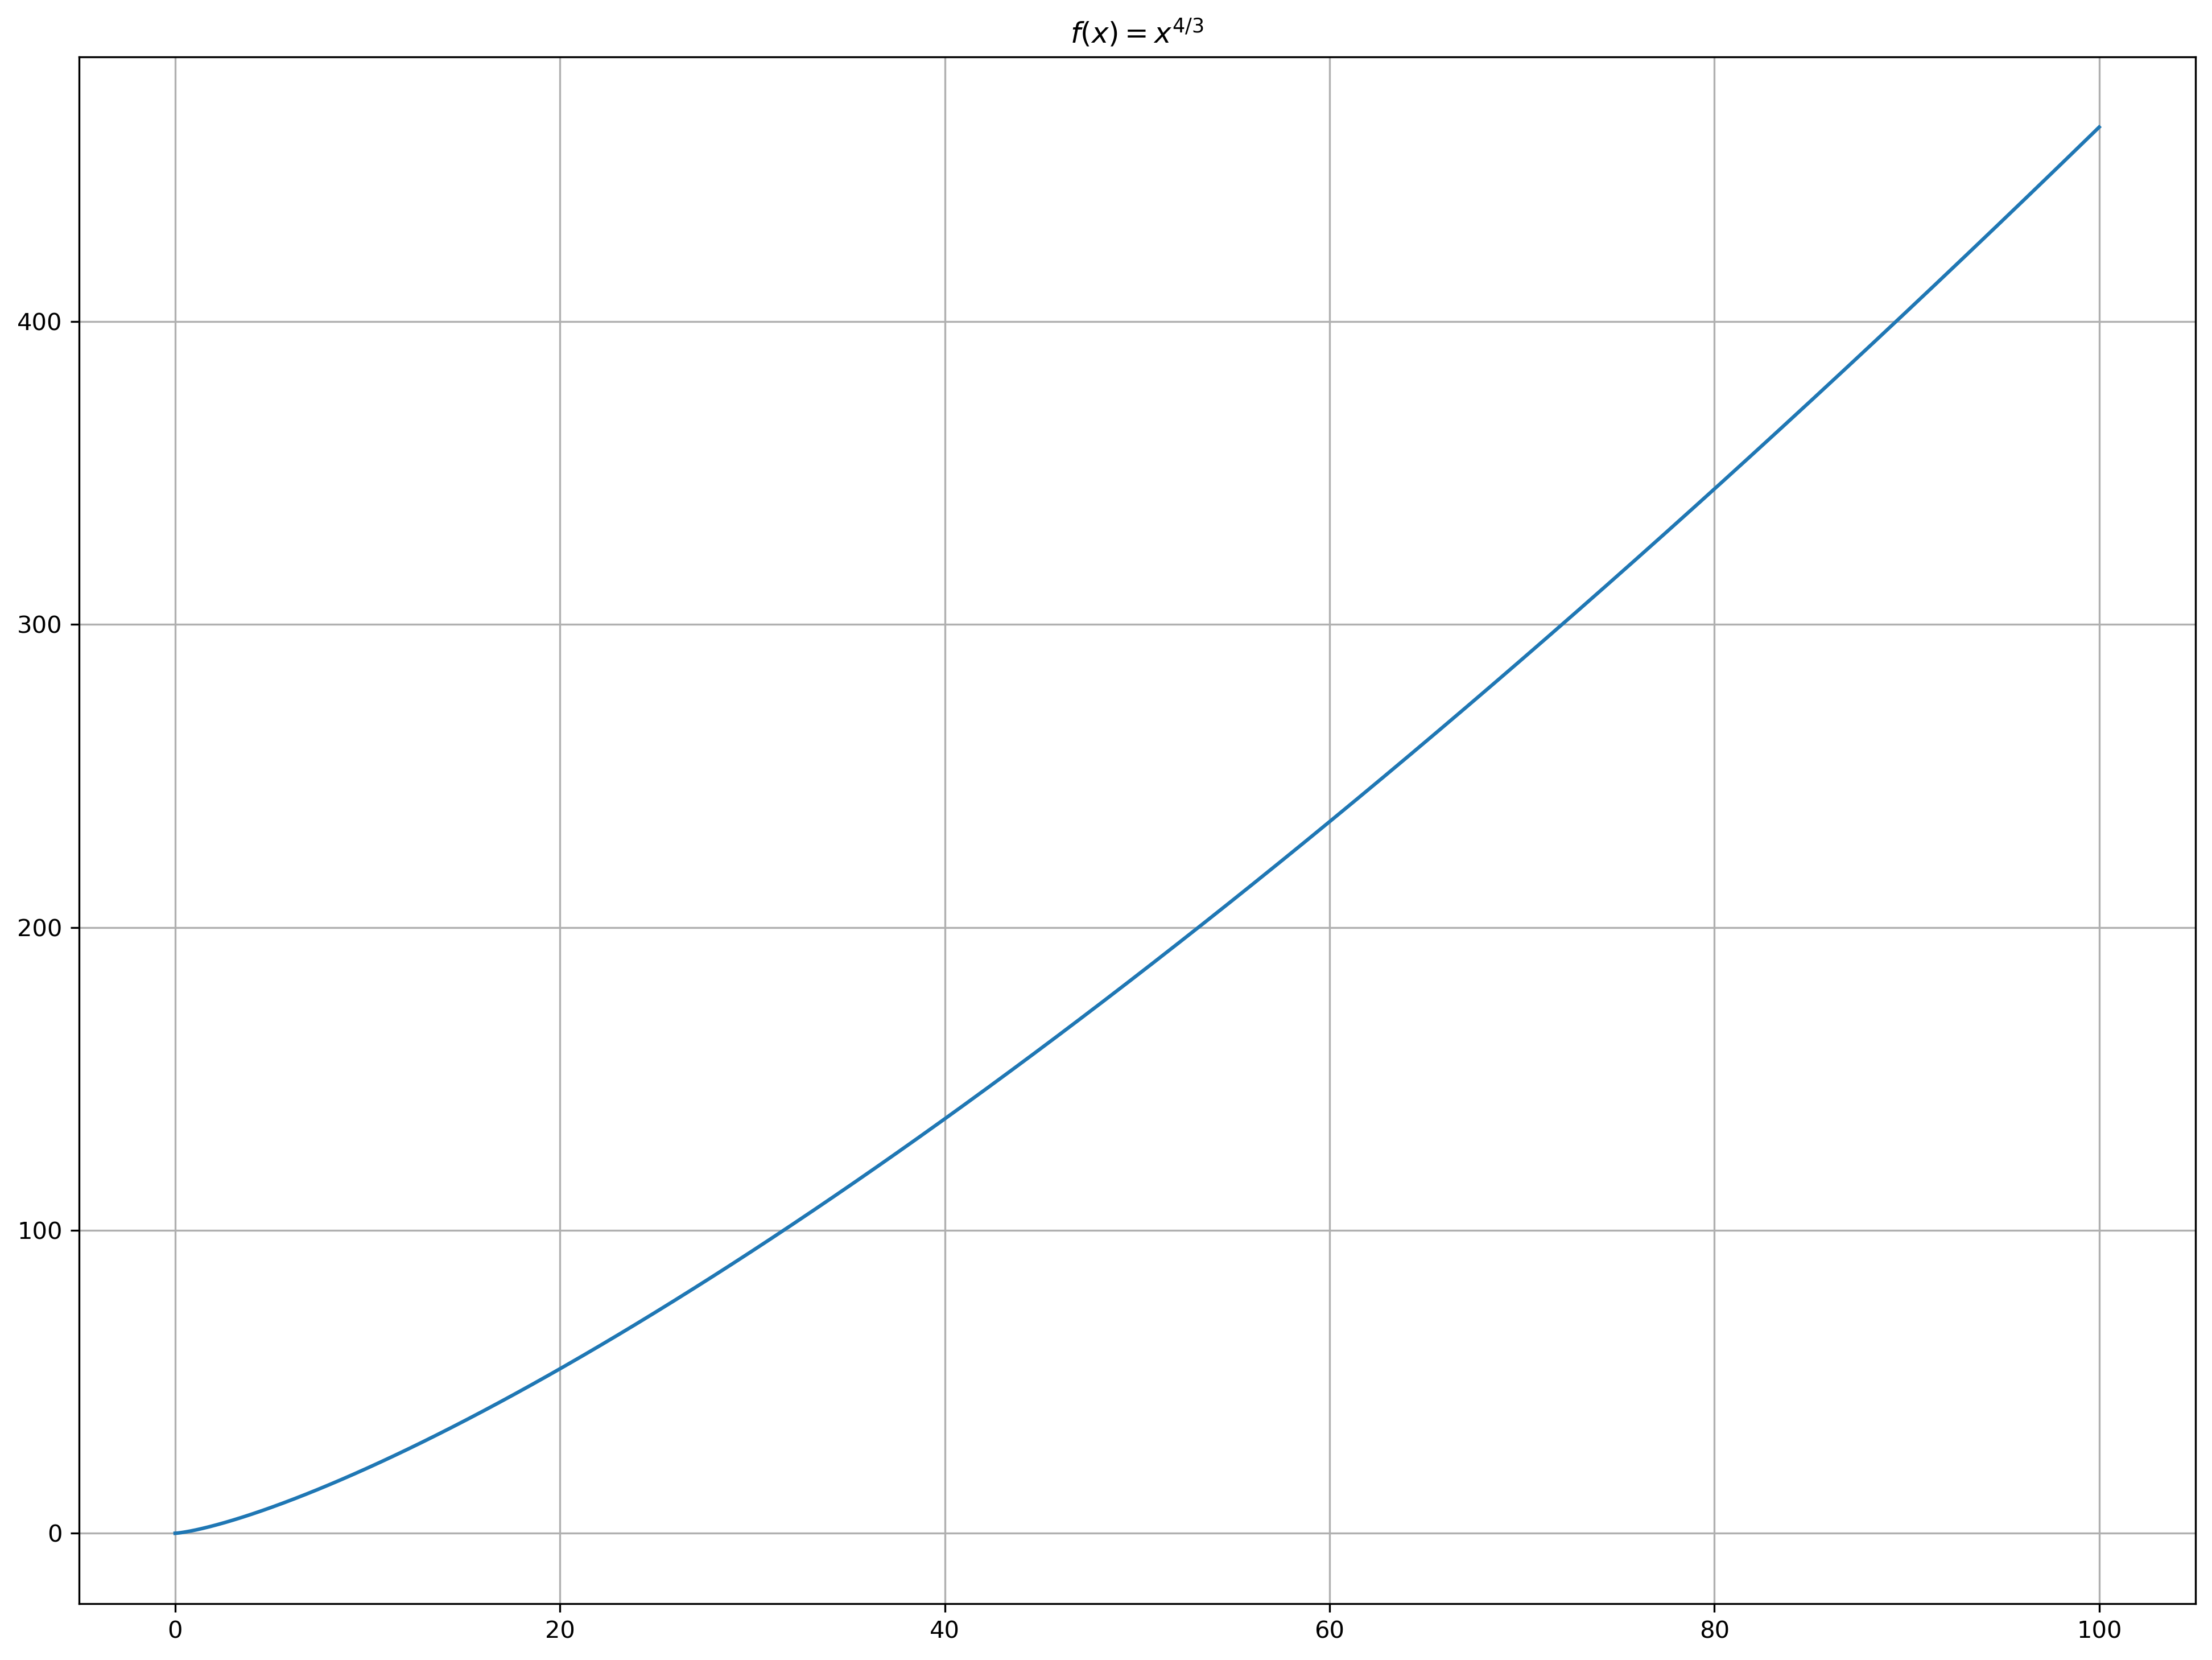

time: 1.76 s


<IPython.core.display.Javascript object>

In [25]:
f = lambda x: x ** (4 / 3)
x = np.linspace(0, 100, 1000)
plt.title("$f(x) = x^{4/3}$")
plt.plot(x, f(x))
plt.grid(True)
plt.show()

\begin{align}
    f^{\prime}(x) &= 4/3x^{1/3} \\
    f^{\prime\prime}(x) &= 4/9x^{-2/3} \\
\end{align}

At the stationary point, $f^\prime (x) = 0$, meaning that $x=0$ is the stationary point. $f^\prime (x>0) > 0$, while $f^\prime (x<0) < 0$, meaning that $x=0$ is a unique minimizer. $\blacksquare$

Proof by Contradiction:

Assuming unit steplength $\alpha_k = 1$, and suppose $x_0 \not= 0$ ($x_0 > 0$ actually, since $f(x)$ is undefined for $x < 0$),

Newton's Method coordinate update step:

\begin{align}
    x_{k+1} &= x_k + \alpha_k p_k \\
    &= x_k + p_k \\
    &= x_k - \frac{f\prime(x_k)}{f^{\prime\prime}(x_k)} \\
    &= x_k -(4/9x^{-2/3}_k)(4/3x^{1/3}_k) \\
    &= x_k -16/27 x^{-1/3}_k \\
\end{align}

Assuming $\underset{k \rightarrow \infty}{\lim}x_k = L$ (we converge to an optimal value), 

\begin{align}
    L &= L -\frac{16}{27L^{1/3}} \\
    0 &= -\frac{16}{27L^{1/3}} \\
\end{align}

If $L \not= 0$, the equation above is contradicting since LHS $\rightarrow 0$, RHS $\rightarrow -\infty$.

Hence, Newton's Method's coordinate update step is undefined for any value of $x_k$, sequence diverges for any nonzero initial point. (When $x_0 = 0$, Newton's Method outputs the optimal $x = x_0$ because test of convergence is before the update step). $\blacksquare$

### 2. 

Compute the first two iterates of the Newton Method (with unit step) starting with $x^0 = (0, 0)$ for minimizing the function: $f(x_1, x_2) = 2x^4_1 + x^2_2 − 4x_1x_2 + 5x_2$. Do the same with the steepest descent method with exact line search.

In [26]:
def line_search(f, f_prime, x_k, p_k, μ=1e-4, η=1):
    """α = argmin_α f(xk + αpk), η=1 for exact, η small for accurate line search"""
    # 1. Set α=1.
    α = 1
    while True:
        # 2. Wolfe conditions:
        # If f(xk+αpk) ≤ f(xk)+μαgkpk, and |g(x+αpk).Tpk| ≤ η|g(xk).Tpk|, set αk=α and stop.
        if f(x_k + α * p_k) <= f(x_k) + μ * α * f_prime(x_k).T @ p_k and np.abs(
            f_prime(x_k + α * p_k).T @ p_k
        ) <= η * np.abs(f_prime(x_k).T @ p_k):
            return α
        else:
            # 3. Set α=α/2 and go to Step2.
            α /= 2

time: 1.38 ms


<IPython.core.display.Javascript object>

Gradient Vector:

\begin{align}
    \nabla f(x_1, x_2) 
    &=
    \begin{bmatrix}
        8x^3_1 - 4x_2 \\
        2x_2 - 4x_1 + 5 \\
    \end{bmatrix} \\
\end{align}

Hessian:

\begin{align}
    \nabla f(x_1, x_2) 
    &=
    \begin{bmatrix}
        24x^2_1 & -4 \\
        -4 & 2 \\
    \end{bmatrix} \\
\end{align}

In [27]:
f = lambda x: 2 * (x[0] ** 4) + x[1] ** 2 - 4 * x[0] * x[1] + 5 * x[1]
f_prime = lambda x: np.array([8 * (x[0] ** 3) - 4 * x[1], 2 * x[1] - 4 * x[0] + 5])
hessian = lambda x: np.array([[24 * (x[0] ** 2), -4], [-4, 2]])

time: 1.36 ms


<IPython.core.display.Javascript object>

Newton's Method with Exact Line Search ($\eta = 1$ in Wolfe Conditions)

In [28]:
newton_raphson_opt(
    f=f,
    f_prime=f_prime,
    hessian=hessian,
    x_0=np.array([0.0, 0.0]),
    steplength_algo=line_search,
)

Iteration: 0 - x_0 = [0. 0.], p_k = [1.25 0.  ], α_k = 0.0, hessian = [[ 0. -4.]
 [-4.  2.]]
Iteration: 1 - x_1 = [0. 0.], p_k = [1.25 0.  ], α_k = 0.0, hessian = [[ 0. -4.]
 [-4.  2.]]
Series diverged.
time: 15.9 ms


<IPython.core.display.Javascript object>

Steepest Descent with Exact Line Search ($\eta = 1$ in Wolfe Conditions)

In [29]:
steepest_descent(
    f=f, f_prime=f_prime, x_0=np.array([0.0, 0.0]), steplength_algo=line_search
)

Iteration: 0 - x_0 = [0. 0.], p_k = [-0. -5.], α_k = 0.5
Iteration: 1 - x_1 = [ 0.  -2.5], p_k = [-10.  -0.], α_k = 0.125
Iteration: 2 - x_2 = [-1.25 -2.5 ], p_k = [ 5.625 -5.   ], α_k = 0.0625
Iteration: 3 - x_3 = [-0.89844 -2.8125 ], p_k = [-5.44832 -2.96875], α_k = 0.0625
Iteration: 4 - x_4 = [-1.23896 -2.99805], p_k = [ 3.22237 -3.95974], α_k = 0.0625
Iteration: 5 - x_5 = [-1.03756 -3.24553], p_k = [-4.04641 -2.65918], α_k = 0.0625
Iteration: 6 - x_6 = [-1.29046 -3.41173], p_k = [ 3.54499 -3.33838], α_k = 0.0625
Iteration: 7 - x_7 = [-1.0689  -3.62038], p_k = [-4.7114  -2.03484], α_k = 0.0625
Iteration: 8 - x_8 = [-1.36336 -3.74756], p_k = [ 5.283   -2.95833], α_k = 0.03125
Iteration: 9 - x_9 = [-1.19827 -3.84   ], p_k = [-1.5958  -2.11306], α_k = 0.125
Iteration: 10 - x_10 = [-1.39774 -4.10414], p_k = [ 5.42945 -2.3827 ], α_k = 0.03125
Iteration: 11 - x_11 = [-1.22807 -4.1786 ], p_k = [-1.89732 -1.5551 ], α_k = 0.0625
Iteration: 12 - x_12 = [-1.34666 -4.27579], p_k = [ 2.4339  -1.

<IPython.core.display.Javascript object>

We observe that Steepest Descent takes quite a while for iterations before realizing that the function is unoptimizable.

### 3. 

Compute and solve the equation of the linear regression line corresponding to the univariate input-output data $(x, y)$ given by $\{(−2, 12),(−1, 11),(0, 8),(1, 5),(2, 2),(3, −3)\}$. Plot these points and the computed line in the $(x, y)$-plane.

Least-Squares / Linear Regression Problem:

\begin{align}
    \underset{\beta}{\text{minimize }} &\frac{1}{2N}\Big(y - X\beta\Big)^2 \\
\end{align}

Gradient Vector First-order Optimality Condition:

\begin{align}
    \nabla_\beta\frac{1}{2N}\Big(y - X\beta\Big)^2
    &= 
    0 \\
    \frac{1}{N}\Bigg(-X^\top\Big(y - X\beta\Big)\Bigg)
    &= 
    0 \\
    X^\top X\beta
    &=
    X^\top y \\
    \hat{\beta}
    &=
    (X^\top X)^{-1}X^\top y \\
\end{align}

Hessian Second Order Sufficient Condition:

\begin{align}
    &\nabla^2_\beta\frac{1}{2N}\Big(y - X\beta\Big)^2 \\
    &\nabla_\beta\frac{1}{N}\Bigg(-X^\top\Big(y - X\beta\Big)\Bigg) \\
    &\frac{1}{N}\Bigg(-X^\top y + X^\top X\beta\Big)\Bigg) \\
    &\frac{1}{N}X^\top X \\
\end{align}

The Hessian is positive semi-definite proof:

For any vector $z: z \in \mathbb{R}^n$,

\begin{align}
    z X^\top Xz &= {\vert\vert Xz \vert\vert}^2_2 \\
    &\geq 0 \blacksquare
\end{align}

As long as $X^\top X$ is invertible (by Invertible Matrix Theorem, non-zero determinant, 0 not an eigenvalue), together with Hessian being at least positive semi-definite, Hessian will be positive definite and the stationary point we found from first-order optimality conditions will yield a global minimizer since Hessian is positive definite for any $\beta$ and function is strictly convex.

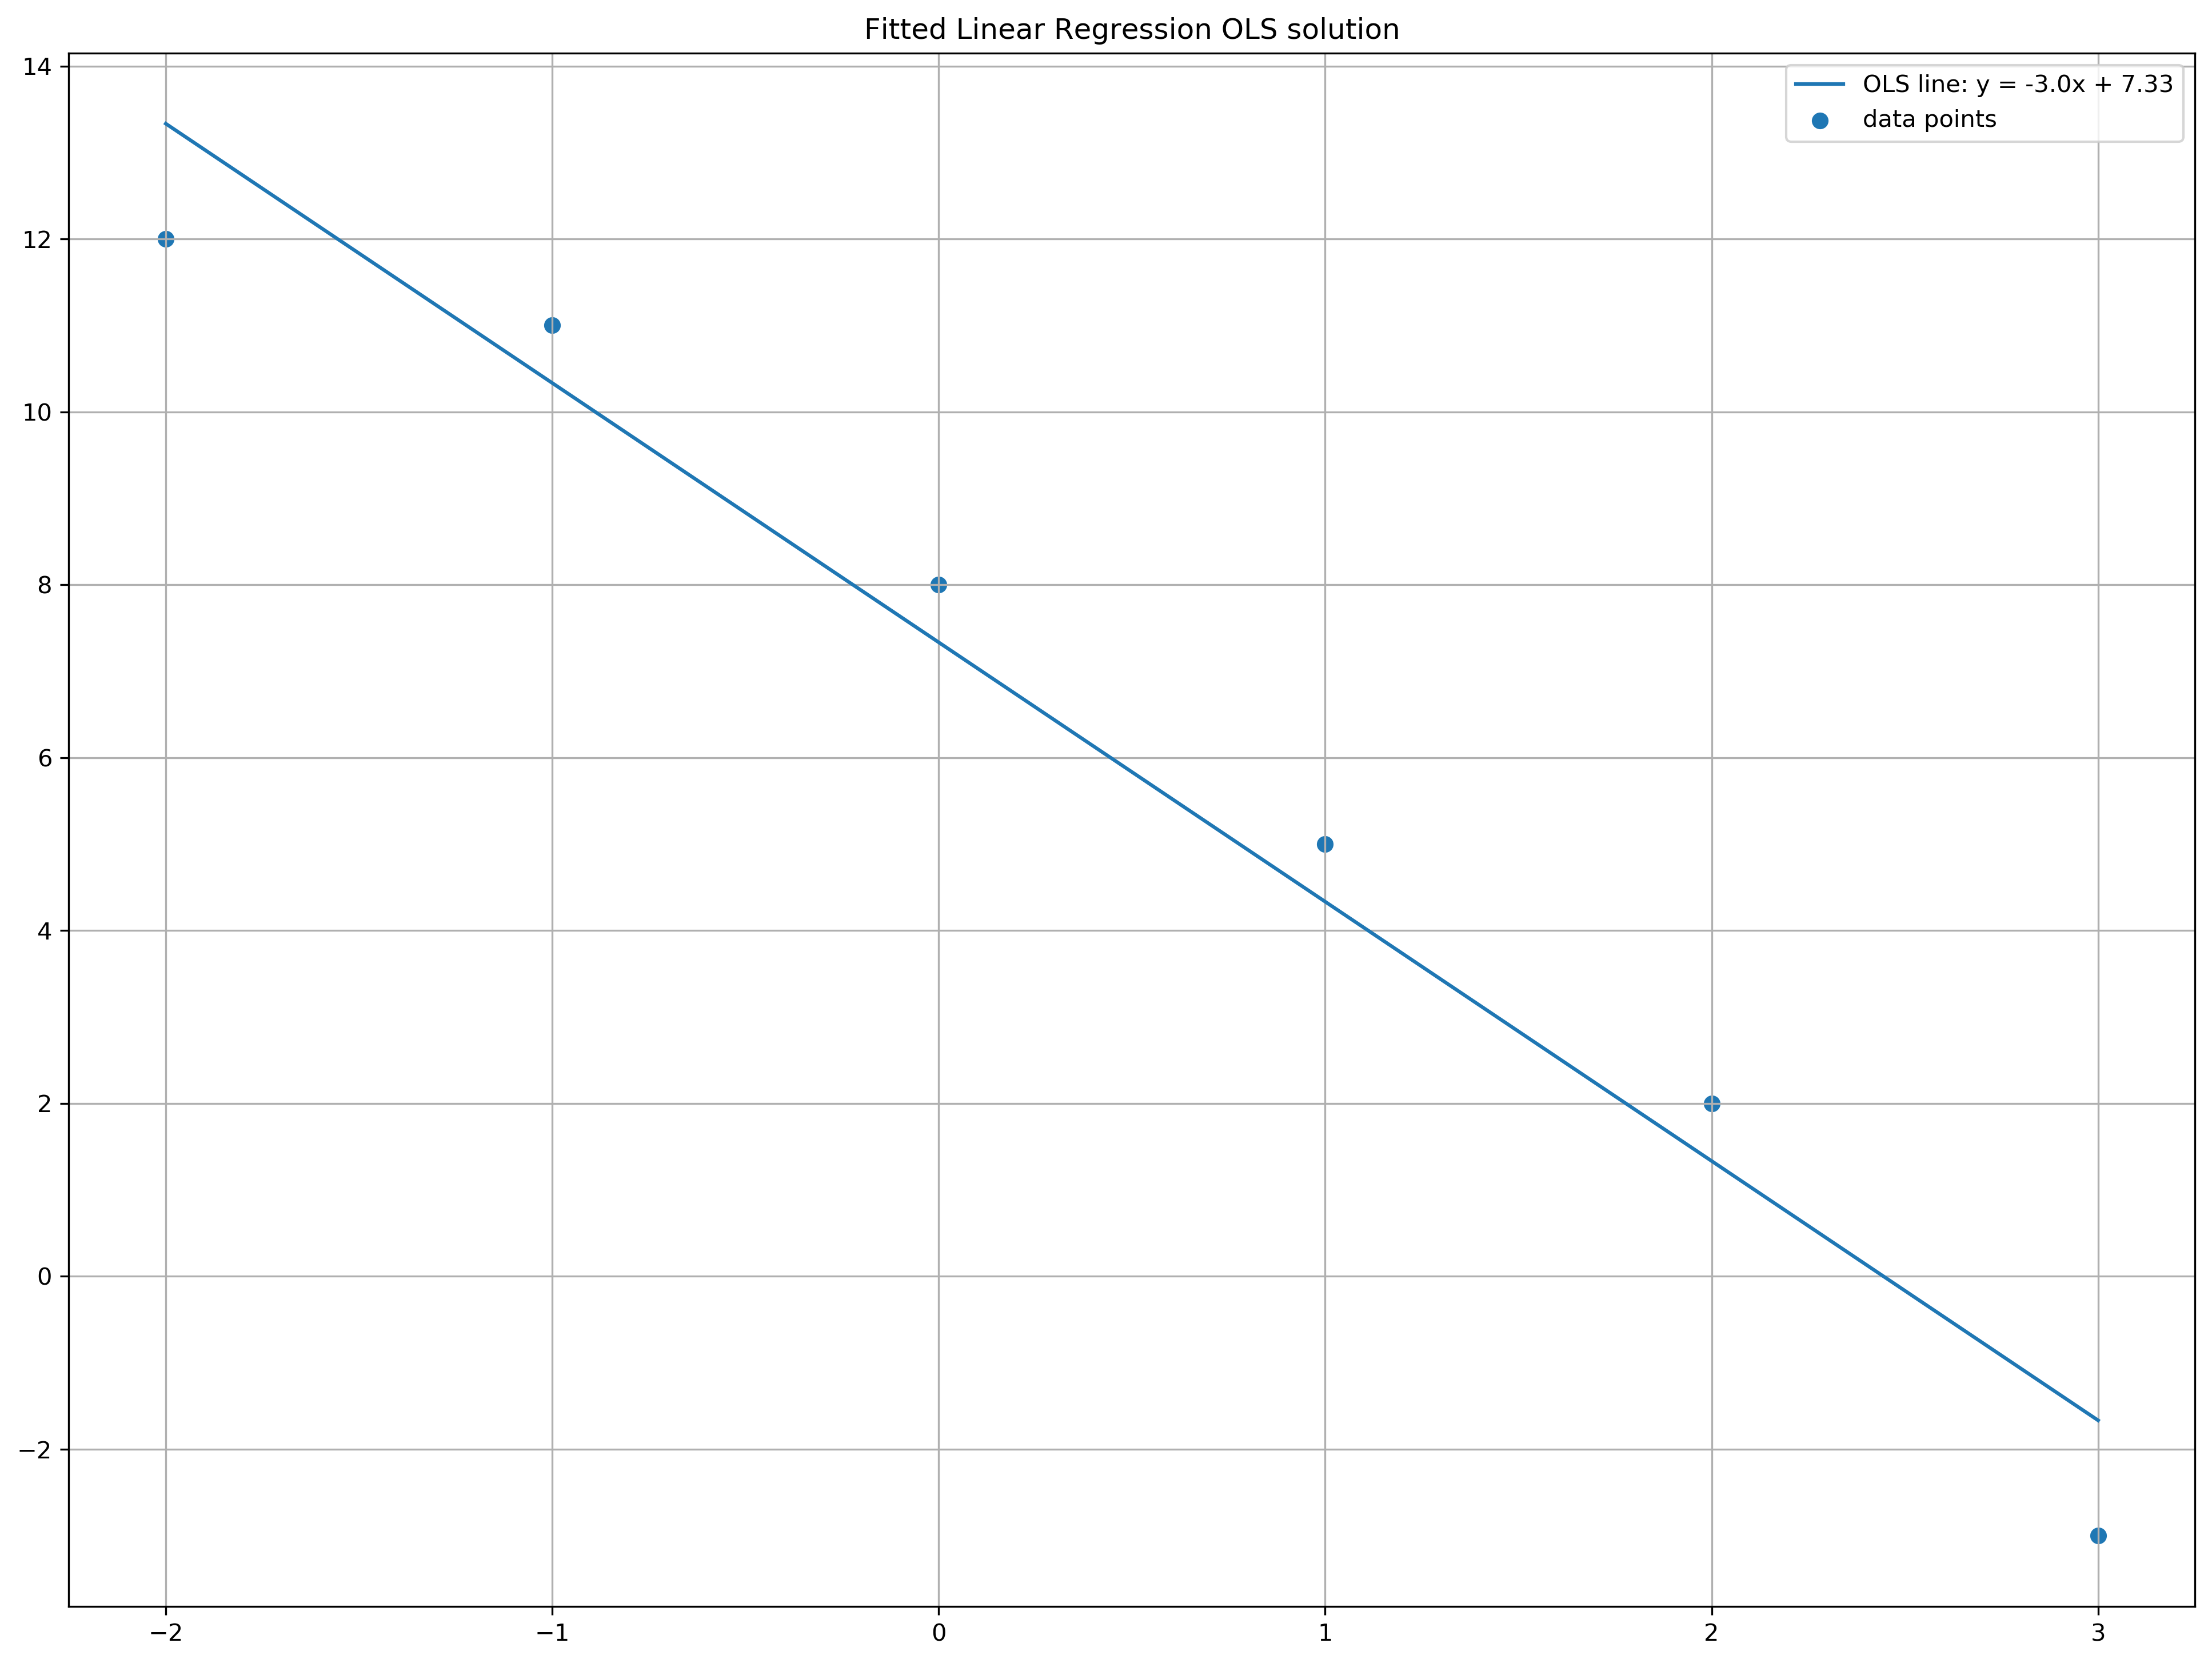

time: 1.69 s


<IPython.core.display.Javascript object>

In [30]:
X, y = (
    np.array([-2, -1, 0, 1, 2, 3]),
    np.array([12, 11, 8, 5, 2, -3]),
)
X = np.concatenate([np.ones((X.shape[0], 1)), np.expand_dims(X, axis=1)], axis=1)
β_hat = np.linalg.inv(X.T @ X) @ X.T @ y
x = np.linspace(X[:, 1].min(), X[:, 1].max(), 1000)
plt.scatter(X[:, 1], y, label="data points")
plt.plot(
    x,
    np.concatenate([np.ones((x.shape[0], 1)), np.expand_dims(x, axis=1)], axis=1)
    @ β_hat,
    label=f"OLS line: y = {np.round(β_hat[1], 2)}x + {np.round(β_hat[0], 2)}",
)
plt.grid(True)
plt.legend()
plt.title("Fitted Linear Regression OLS solution")
plt.show()

### 4. 

Suppose that the (univariate) variable $y$ is known to be a quadratic function of the variable $x$; that is,
\begin{align}
    y = ax^2 +bx + c,
\end{align} 
where the coefficients $a, b, c$ are obtained by conducting an experiment in which values $y_1, \cdots, y_n$ of the variable $y$ are measured for corresponding values $x_1, \cdots, x_n$ of the variable $x$. Find the best least-squares fit of the quadratic polynomial using the data:
\begin{align}
    &\{ (−2, −5),(−1, −1),(0, 4),(1, 7),(2, 6),(3, 5),(4, −1) \}.
\end{align}
Plot these points and the computed quadratic curve in the $(x, y)$-plane.

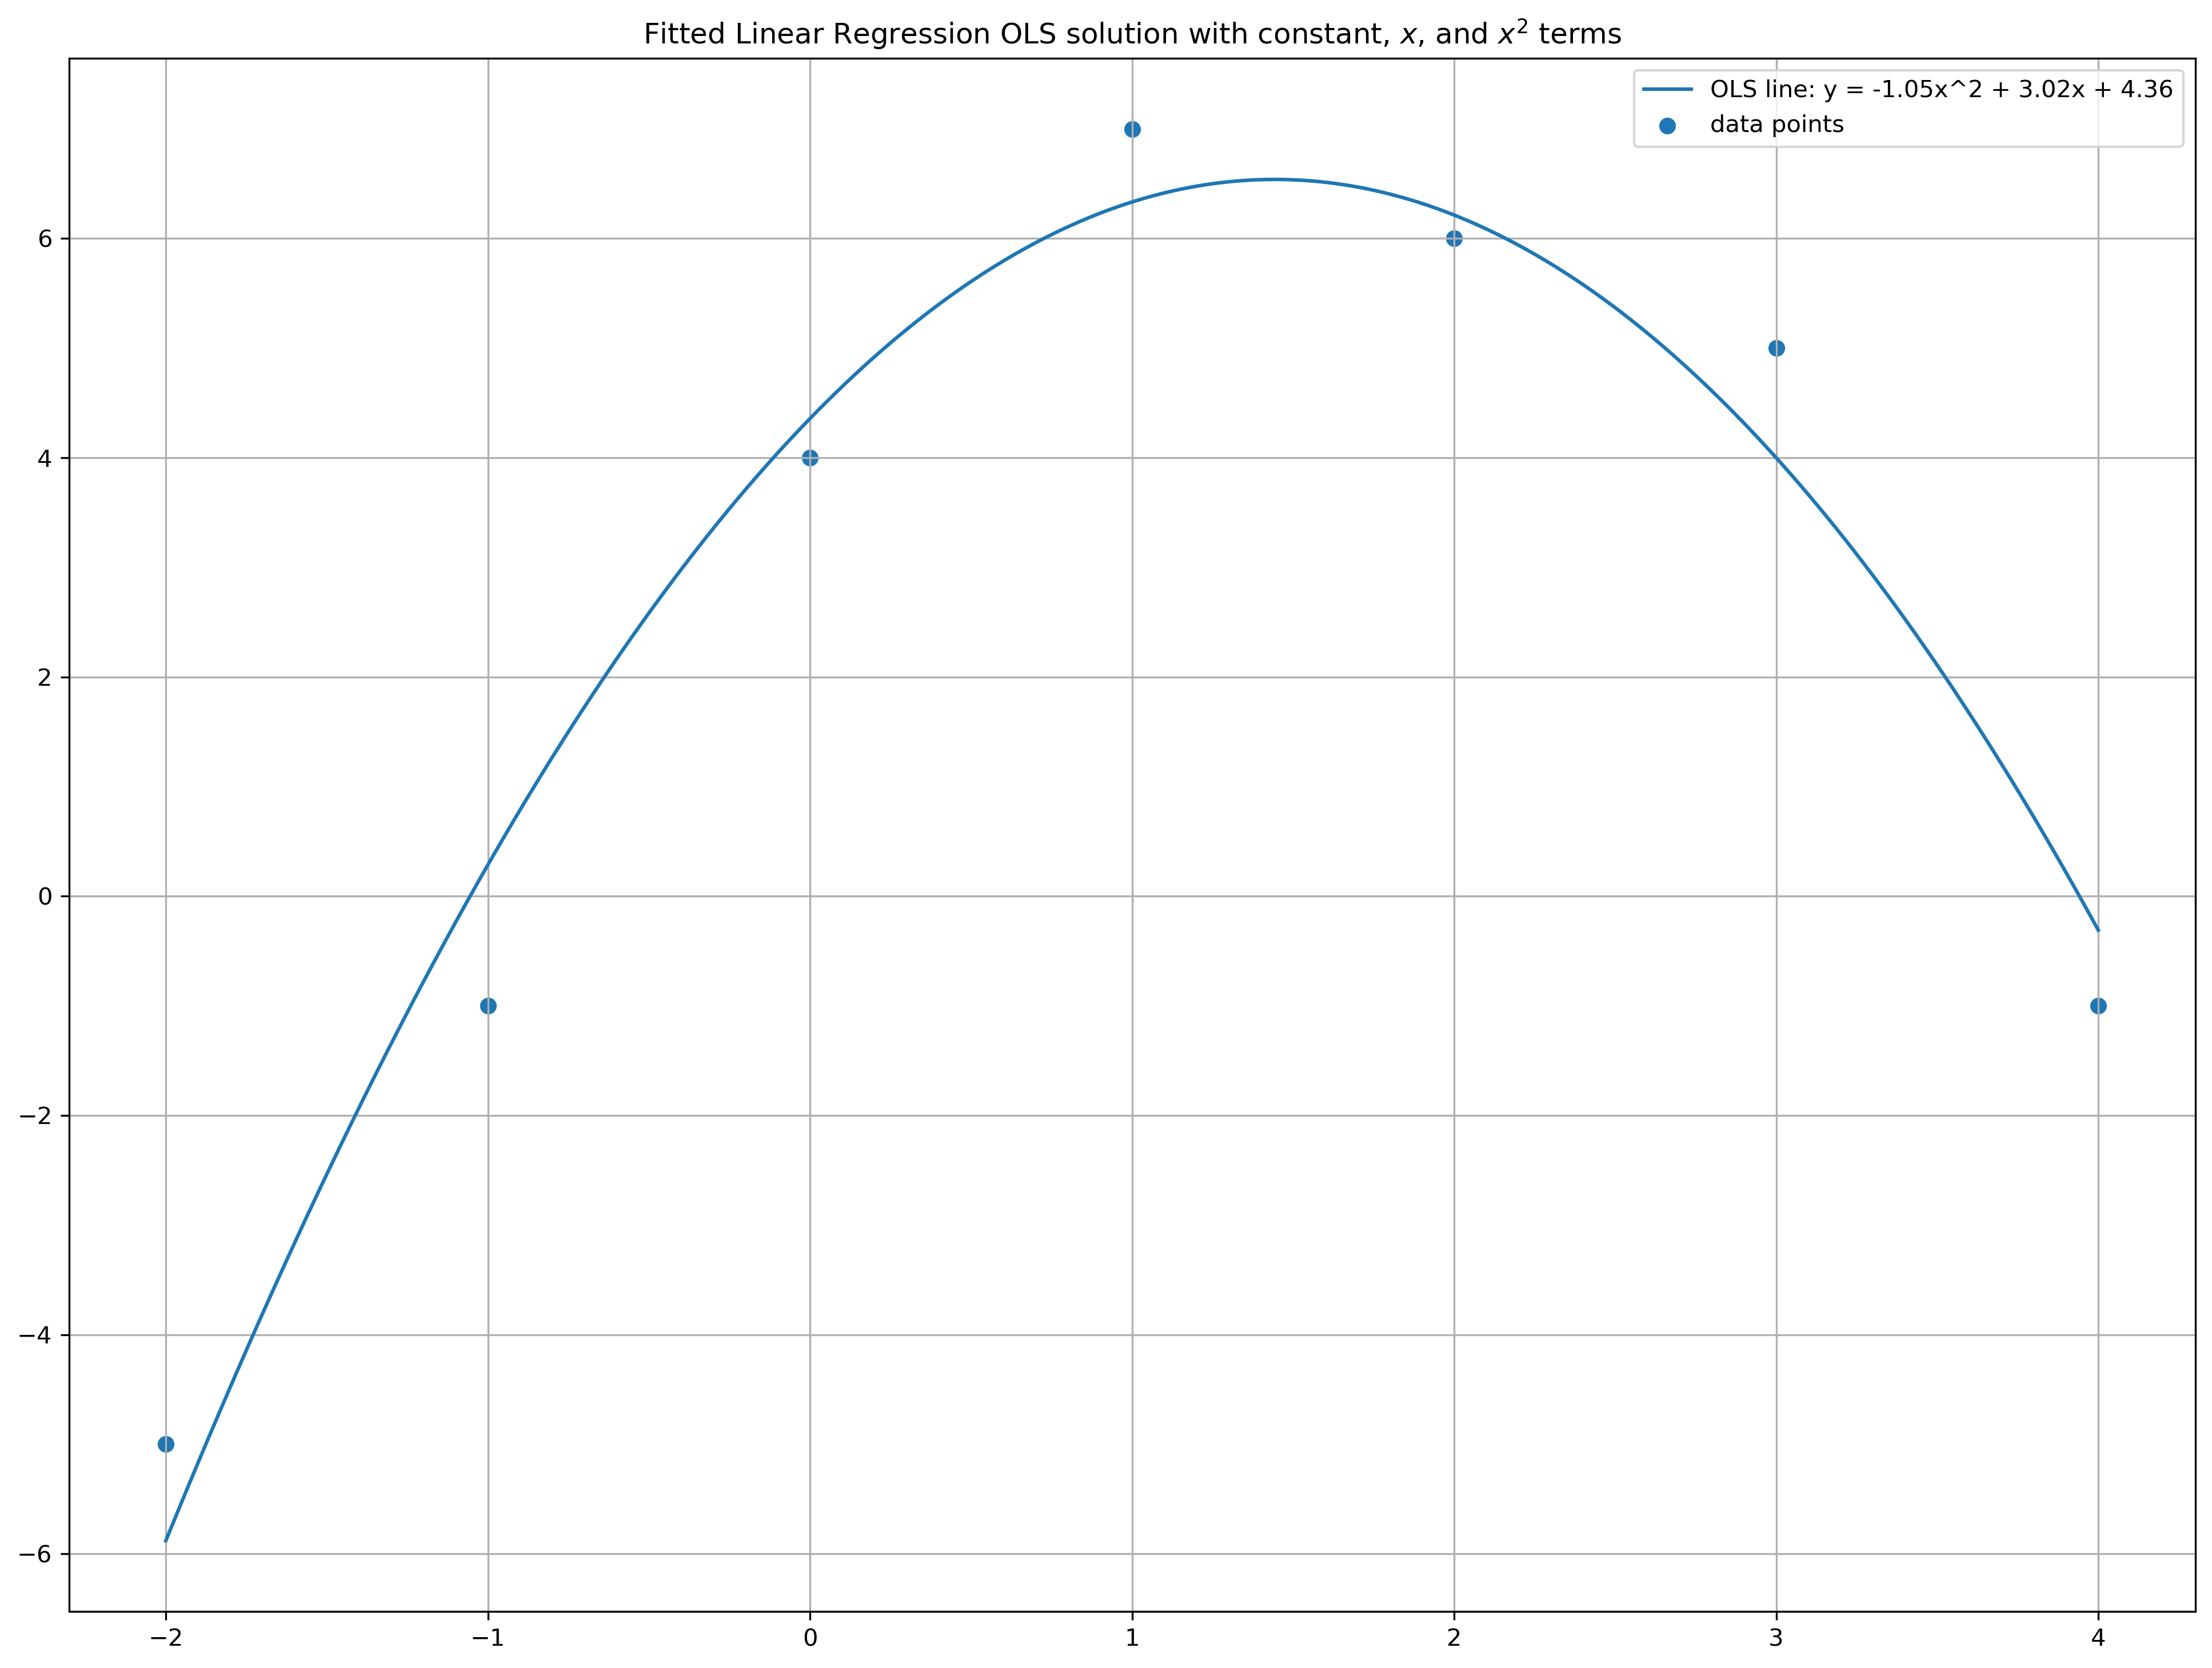

time: 1.79 s


<IPython.core.display.Javascript object>

In [31]:
data = [(-2, -5), (-1, -1), (0, 4), (1, 7), (2, 6), (3, 5), (4, -1)]
X, y = np.array(list(zip(*data)))
X = np.concatenate(
    [
        np.ones((X.shape[0], 1)),
        np.expand_dims(X, axis=1),
        np.expand_dims(X ** 2, axis=1),
    ],
    axis=1,
)
β_hat = np.linalg.inv(X.T @ X) @ X.T @ y
x = np.linspace(X[:, 1].min(), X[:, 1].max(), 1000)
plt.scatter(X[:, 1], y, label="data points")
plt.plot(
    x,
    np.concatenate(
        [
            np.ones((x.shape[0], 1)),
            np.expand_dims(x, axis=1),
            np.expand_dims(x ** 2, axis=1),
        ],
        axis=1,
    )
    @ β_hat,
    label=f"OLS line: y = {np.round(β_hat[2], 2)}x^2 + {np.round(β_hat[1], 2)}x + {np.round(β_hat[0], 2)}",
)
plt.grid(True)
plt.legend()
plt.title("Fitted Linear Regression OLS solution with constant, $x$, and $x^2$ terms")
plt.show()

### 5

Show that the matrix
\begin{align}
    \begin{bmatrix}
        x^4 & x^3 & x^2 \\
        x^3 & x^2 & x \\
        x^2 & x & 1 \\
    \end{bmatrix}
\end{align}
is positive semidefinite but not positive definite for all values of the scalar $x$.

Proof:

Since $x$ is a scalar, divide 1st row by $x^2$, and 2nd row by $x$:

\begin{align}
    \begin{bmatrix}
        x^2 & x & 1 \\
        x^2 & x & 1 \\
        x^2 & x & 1 \\
    \end{bmatrix}
\end{align}

Subtract 1st row from 2nd and last row:

\begin{align}
    \begin{bmatrix}
        x^2 & x & 1 \\
        0 & 0 & 0 \\
        0 & 0 & 0 \\
    \end{bmatrix}
\end{align}

Any triangular / diagonal matrix's diagonal entries are its eigenvalues:
Hence, our Eigenvalues $\lambda = x^2, 0, 0$. Since our eigenvalues are $\geq 0$, but not $> 0$, we have a positive semidefinite matrix, but not a positive definite matrix. $\blacksquare$